<div style="text-align: center; background-color: #958791; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Exploration and Preprocessing
  
</div>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #EDC0C7; font-family: newtimeroman; color: black; padding: 14px; line-height: 1; border-radius: 10px"><b> 🔖Mục lục </b></h3>
    <ul>
        <li><a href="#0" class="list-group-item list-group-item-action">0. Khai báo thư viện</a></li>
        <li><a href="#1" class="list-group-item list-group-item-action">1. Tổng quan dữ liệu</a></li>
        <ul>
            <li><a href="#1.1" class="list-group-item list-group-item-action">1.1 Xét các hàng và các cột</a></li>
            <li><a href="#1.2" class="list-group-item list-group-item-action">1.2 Kiểm tra và xử lý những hàng trùng nhau</a></li>
            <li><a href="#1.3" class="list-group-item list-group-item-action">1.3 Kiểu dữ liệu</a></li>
        </ul>
        <li><a href="#2" class="list-group-item list-group-item-action">2. Phân phối dữ liệu</a></li>
        <ul>
            <li><a href="#2.1" class="list-group-item list-group-item-action">2.1 Các cột số</a></li>
            <li><a href="#2.2" class="list-group-item list-group-item-action">2.2 Các cột phân loại</a></li>
            <li><a href="#2.3" class="list-group-item list-group-item-action">2.3 Xử lý các cột và hàng bị thiếu giá trị</a></li>
        </ul>
        <li><a href="#3" class="list-group-item list-group-item-action">3. Trực quan hóa dữ liệu</a></li>
        <ul>
            <li><a href="#3.1" class="list-group-item list-group-item-action">3.1 Top 10 Anime có số điểm cao nhất</a></li>
            <li><a href="#3.2" class="list-group-item list-group-item-action">3.2 Top 10 Anime có lượt xem cao nhất</a></li>
            <li><a href="#3.3" class="list-group-item list-group-item-action">3.3 Top 10 Anime được yêu thích nhất</a></li>
        </ul>
        <li><a href="#4" class="list-group-item list-group-item-action">4. Tóm tắt</a></li>
        <li><a href="#5" class="list-group-item list-group-item-action">5. Lưu lại dữ liệu sau khi xử lý</a></li>
    </ul>
</div>

<a class="anchor" id="0"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">0. Khai báo thư viện </div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
import ast
import re

# Disable future warnings and user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<a class="anchor" id="#1"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Tổng quan về dữ liệu  </div>

In [2]:
anime_df = pd.read_csv('../data/anime.csv')
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


<a class = "anchor" id = "1.1"></a>
## <span style='color:#2B9C15 '> 1.1 Xét các hàng và các cột </span>

### 👉 **Tổng số hàng và cột** 

In [3]:
n_rows , n_cols = anime_df.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột')

Dữ liệu có 17562 dòng và 35 cột


### 👉 **Ý nghĩa của từng cột và hàng** 

In [4]:
anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

+ Mỗi hàng là thông tin của 1 anime 

+ Ý nghĩa của từng cột trong dữ liệu được tóm tắt trong bảng sau:

| **TÊN CỘT**          |**Ý NGHĨA**               |
|:---------------------|:-------------------------------------------------------------|
|**`MAL_ID`**          | ID của mỗi anime trong MyAnimeList (MAL), mỗi anime sẽ có 1 ID riêng biệt               |
|**`Name`**            | Tựa đề của anime                                                             |
|**`Score`**           | Điểm trung bình của anime được tính trên toàn bộ cơ sở dữ liệu trên MAL                   |
|**`Genres`**          | Danh sách các thể loại của anime                                                    |
|**`English name`**    | Tựa đề tiếng Anh của anime                                                |
|**`Japanese name`**   | Tựa đề tiếng Nhật của anime                       |
|**`Type`**            | Dạng phát hành của anime (TV, movie, OVA,...)                               |
|**`Episodes`**        | Số tập của anime                                                                      |
|**`Aired`**           | Ngày phát hành anime                                                                      |
|**`Premiered`**       | Thời gian phát hành của anime tính theo 4 mùa trong 1 năm                                  |
|**`Producers`**      | Danh sách những đơn vị sản xuất anime                                                       |
|**`Licensors`**       | Danh sách những đơn vị cấp phép cho anime                                                    |
|**`Studios`**         | Danh sách các Studios làm ra anime                            |
|**`Source`**          | Nguồn gốc của anime trước khi được chuyển thể (Manga, Light novel, Book,...)                      |
|**`Duration`**        | Độ dài của 1 tập anime phát sóng                                                |
|**`Rating`**          | Độ tuổi giới hạn để có thể coi anime    |
|**`Ranked`**          | Xếp hạng của anime dựa trên điểm trung     |
|**`Popularity`**      | Độ phổ biến của anime dựa trên số lượng người thêm anime vào danh sách của họ    |
|**`Members`**         | Số lượng người dùng có anime này trong list của họ    |
|**`Favorites`**       | Số lượng người dùng yêu thích anime này    |
|**`Watching`**        | Số lượng người đã xem anime này   |
|**`Completed`**       | Số lượng người dùng đã xem hết anime    |
|**`On-Hold`**         | Số lượng người dùng đang xem anime này nhưng đang tạm dừng lại    |
|**`Dropped`**         | Số lượng người dùng đang xem anime này nhưng bỏ không xem nữa   |
|**`Plan to Watch`**   | Số lượng người dùng dự định xem anime.|
|**`Score-10`**        | Số lượng người chấm anime 10 điểm     |
|**`Score-9`**         | Số lượng người chấm anime 9 điểm     |
|**`Score-8`**         | Số lượng người chấm anime 8 điểm     |
|**`Score-7`**         | Số lượng người chấm anime 7 điểm     |
|**`Score-6`**         | Số lượng người chấm anime 6 điểm     |
|**`Score-5`**         | Số lượng người chấm anime 5 điểm     |
|**`Score-4`**         | Số lượng người chấm anime 4 điểm     |
|**`Score-3`**         | Số lượng người chấm anime 3 điểm     |
|**`Score-2`**         | Số lượng người chấm anime 2 điểm     |
|**`Score-1`**         | Số lượng người chấm anime 1 điểm     |


<a class = "anchor" id = "1.2"></a>
## <span style='color:#2B9C15 '> 1.2 Kiểm tra và xử lý những hàng trùng nhau </span>

In [5]:
duplicated_rows = anime_df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    anime_df = anime_df.drop_duplicates()
    print(f'After drop duplicated rows, there are {anime_df.shape[0]} rows left')

There are 0 rows that are duplicated, which means each row in the DataFrame is unique.
So that we do not need to continue processing duplicate lines


<a class = "anchor" id = "1.3"></a>
## <span style='color:#2B9C15 '> 1.3 Kiểu dữ liệu </span>

Trong phần này, chúng tôi sẽ **kiểm tra các loại dữ liệu hiện tại** của từng cột và **chuyển đổi chúng thành loại dữ liệu chính xác** nếu cần.

### 👉 **Kiểm tra kiểu dữ liệu hiện tại của từng cột**

Đầu tiên chúng ta tính toán kiểu dữ liệu (dtype) của mỗi cột trong `anime_df` bằng cách sử dụng hàm `dtypes` của thư viện `pandas`.

In [6]:
anime_df.dtypes.to_frame('Data Type')

,Data Type
MAL_ID,int64
Name,object
Score,object
Genres,object
English name,object
Japanese name,object
Type,object
Episodes,object
Aired,object
Premiered,object


Để hiểu rõ hơn về các cột kiểu `object`, chúng ta sẽ phân tích chúng thành từng kiểu con bằng hàm `open_object_dtype()`

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(lambda x: type(x).__name__))
    return ', '.join(sorted(dtypes))  # Converting set to a sorted string

unique_types_per_column = anime_df.apply(open_object_dtype)
unique_types_per_column

MAL_ID           int
Name             str
Score            str
Genres           str
English name     str
Japanese name    str
Type             str
Episodes         str
Aired            str
Premiered        str
Producers        str
Licensors        str
Studios          str
Source           str
Duration         str
Rating           str
Ranked           str
Popularity       int
Members          int
Favorites        int
Watching         int
Completed        int
On-Hold          int
Dropped          int
Plan to Watch    int
Score-10         str
Score-9          str
Score-8          str
Score-7          str
Score-6          str
Score-5          str
Score-4          str
Score-3          str
Score-2          str
Score-1          str
dtype: object

Kế đến chúng ta hãy tiến hành đánh giá các loại dữ liệu của các cột trong tập dữ liệu của để đảm bảo tính phù hợp:

+ Các cột có kiểu dữ liệu phù hợp: `Popularity`, `Members`, `Favorites`, `Watching`, `Completed`, `On-Hold`, `Dropped`, `Plan to Watch`, `Source` và `Duration`          

+ Các cột cần phải chuyển đổi về kiểu **int/float**: `Score`, `Episodes`, `Ranked`, `Score-10`, `Score-9`, `Score-8`, `Score-7`, `Score-6`, `Score-5`, `Score-4`, `Score-3`, `Score-2` và `Score-1`          

+ Các cột cần phải chuyển đổi về kiểu **list**: `Genres`, `Producers`, `Licensors` và `Studios` 

+ Cột cần phải chuyển đổi về kiểu **datetime**: `Aired`

### 👉 **Chuyển đổi kiểu dữ liệu**

Đầu tiên chuyển đổi kiểu dữ liệu của các cột thành **int/float**

In [8]:
columns_to_convert = ['Score', 'Episodes', 'Ranked', 
                      'Score-10', 'Score-9', 'Score-8', 
                      'Score-7', 'Score-6', 'Score-5', 
                      'Score-4', 'Score-3', 'Score-2', 'Score-1']

# Convert columns to numeric
for col in columns_to_convert:
    # Using errors='coerce' to handle non-numeric values and missing data
    anime_df[col] = pd.to_numeric(anime_df[col], errors='coerce')

Sau đó, chúng ta hãy kiểm tra lại kiểu dữ liệu của các cột `Score`, `Episodes`, `Ranked`, `Score-10`, `Score-9`, `Score-8`, `Score-7`, `Score-6`, `Score-5`, `Score-4`, `Score-3`, `Score-2` và `Score-1`.          

In [9]:
anime_df[columns_to_convert].dtypes

Score       float64
Episodes    float64
Ranked      float64
Score-10    float64
Score-9     float64
Score-8     float64
Score-7     float64
Score-6     float64
Score-5     float64
Score-4     float64
Score-3     float64
Score-2     float64
Score-1     float64
dtype: object

Đặc biệt, ta sẽ xem xét cột **`Duration`** - cột này được dùng để hiển thị thời gian 1 tập của anime nên kiểu dữ liệu str không phù hợp với dữ liệu. Ta sẽ chuyển kiểu dữ liệu của cột này từ **str** về loại **int/float** với đơn vị là **phút**.

Sau khi chuyển đổi ta sẽ lưu dữ liệu mới thành cột `mins_per_ep` và xóa đi cột `Duration` cũ để tránh dư thừa.

In [10]:
anime_df['Duration'].replace(' per ep.', '', inplace=True, regex=True)

duration = []

for row in anime_df['Duration']:
    if 'min' in row and 'hr' not in row:
        tmp = row.split(' ')
        duration.append(int(tmp[0]))
    elif 'min' not in row and 'hr' in row:
        tmp = row.split(' ')
        duration.append(int(tmp[0]))
    elif 'min' in row and 'hr' in row:
        tmp = row.split(' ')
        time = int(tmp[0]) * 60 + int(tmp[2])
        duration.append(time)
    else:
        duration.append(np.nan)
        
anime_df['Mins_per_ep'] = pd.Series(duration)
anime_df = anime_df.drop(columns='Duration')

Cùng kiểm tra lại dữ liệu sau khi chuyển đổi trên

In [11]:
anime_df['Mins_per_ep'].dtype

dtype('float64')

Bước tiếp theo, chúng ta sẽ tiến hành chuyển đổi kiểu dữ liệu của các cột thành **list**

Các giá trị trước khi chuyển đổi:

In [12]:
list_columns = ['Genres', 'Producers', 'Licensors', 'Studios']
anime_df[list_columns].head(5)

,Genres,Producers,Licensors,Studios
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise
1,"Action, Drama, Mystery, Sci-Fi, Space","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones
2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse
3,"Action, Mystery, Police, Supernatural, Drama, ...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise
4,"Adventure, Fantasy, Shounen, Supernatural","TV Tokyo, Dentsu",Unknown,Toei Animation


Sau khi chuyển đổi:

In [13]:
def convert_to_list(s):
    if pd.isna(s) or s == 'Unknown':
        return []
    return s.split(', ')

for col in list_columns:
    anime_df[col] = anime_df[col].apply(convert_to_list)

anime_df[list_columns].head(5)

,Genres,Producers,Licensors,Studios
0,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Bandai Visual],"[Funimation, Bandai Entertainment]",[Sunrise]
1,"[Action, Drama, Mystery, Sci-Fi, Space]","[Sunrise, Bandai Visual]",[Sony Pictures Entertainment],[Bones]
2,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",[Victor Entertainment],"[Funimation, Geneon Entertainment USA]",[Madhouse]
3,"[Action, Mystery, Police, Supernatural, Drama,...","[TV Tokyo, Bandai Visual, Dentsu, Victor Enter...","[Funimation, Bandai Entertainment]",[Sunrise]
4,"[Adventure, Fantasy, Shounen, Supernatural]","[TV Tokyo, Dentsu]",[],[Toei Animation]


Cuối cùng, chúng ta tiến hành chuyển đổi `Aired` về kiểu **datetime**.
- Do sự phức tạp của việc lưu trữ thông tin trong cột `Aired`, biểu thị phạm vi từ ngày phát hành đến ngày kết thúc, chúng tôi dự định tăng cường xử lý dữ liệu bằng cách tách cột này thành hai cột mới: `Start Date` và `End Date` .

- Sau thao tác này, chúng tôi sẽ xóa cột `Aired` ban đầu để tránh dư thừa.

In [14]:
start = []
end = []

for row in anime_df['Aired']:
    if ' to ' in row:
        s, e = row.split(' to ')

        if s.isdigit() and e.isdigit():
            s = f"01 Jan, {s}"
            e = f"01 Jan, {e}"
        elif len(s.split()) == 2 and len(e.split()) == 2:
            s = f"{s}, {dt.now().year}"
            e = f"{e}, {dt.now().year}"

    elif row.isdigit():
        s = f"01 Jan, {row}"
        e = np.nan
    else:
        try:
            s = parse(row, fuzzy=True)
            e = np.nan
        except ValueError:
            s = np.nan
            e = np.nan

    start.append(s)
    end.append(e)

date_df = pd.DataFrame({'Start Date': start, 'End Date': end})

# Assigning the new columns to anime_df
anime_df['Start Date'] = date_df['Start Date']
anime_df['End Date'] = date_df['End Date']

# Convert 'Start Date' and 'End Date' to datetime64 and set time to midnight
anime_df['Start Date'] = pd.to_datetime(anime_df['Start Date'], errors='coerce').dt.normalize()
anime_df['End Date'] = pd.to_datetime(anime_df['End Date'], errors='coerce').dt.normalize()

# Dropping the original 'Aired' column
anime_df = anime_df.drop(columns='Aired')

Sau khi chuyển đổi thì kiểm tra lại kiểu dữ liệu của hai cột `Start Date` và `End Date`

In [15]:
anime_df[['Start Date', 'End Date']].dtypes

Start Date    datetime64[ns]
End Date      datetime64[ns]
dtype: object

Sau cùng, kiểm tra lại kiểu dữ liệu của toàn bộ các cột trong tập dữ liệu

In [16]:
unique_types_per_column = anime_df.apply(open_object_dtype)
unique_types_per_column

MAL_ID                          int
Name                            str
Score                         float
Genres                         list
English name                    str
Japanese name                   str
Type                            str
Episodes                      float
Premiered                       str
Producers                      list
Licensors                      list
Studios                        list
Source                          str
Rating                          str
Ranked                        float
Popularity                      int
Members                         int
Favorites                       int
Watching                        int
Completed                       int
On-Hold                         int
Dropped                         int
Plan to Watch                   int
Score-10                      float
Score-9                       float
Score-8                       float
Score-7                       float
Score-6                     

<a class = "anchor" id = "2"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Phân phối dữ liệu </div>

Để khám phá sự phân bố của các cột, chúng ta sẽ làm theo các bước sau:

- Cột số:
     - Tính toán và giải thích **số liệu thống kê tóm tắt** của các cột
     - Vẽ **biểu đồ** để hiểu rõ hơn về sự phân bố của các cột

- Các cột phân loại:
     - Tính số **giá trị duy nhất** trong mỗi cột
     - Vẽ **biểu đồ** để hiểu rõ hơn về sự phân bố của các cột

- Giá trị bất thường, giá trị thiếu và giá trị ngoại lệ:
     - Tính số giá trị còn thiếu trên mỗi cột, mỗi hàng và xử lý chúng
     - Xác định và xử lý các giá trị bất thường và các ngoại lệ

<a class = "anchor" id = "2.1"></a>
## <span style='color:#2B9C15 '>2.1 Các cột số </span>

Các cột có kiểu dữ liệu số:
| **Name**       | **Data Type** |
|:---------------|:--------------|
| `MAL_ID`       | int64         |
| `Score`        | float64       |
| `Mins_per_ep`  | float64       |
| `Episodes`     | float64       |
| `Ranked`       | float64       |
| `Popularity`   | int64         |
| `Members`      | int64         |
| `Favorites`    | int64         |
| `Watching`     | int64         |
| `Completed`    | int64         |
| `On-Hold`      | int64         |
| `Dropped`      | int64         |
| `Plan to Watch`| int64         |
| `Score-10`     | float64       |
| `Score-9`      | float64       |
| `Score-8`      | float64       |
| `Score-7`      | float64       |
| `Score-6`      | float64       |
| `Score-5`      | float64       |
| `Score-4`      | float64       |
| `Score-3`      | float64       |
| `Score-2`      | float64       |
| `Score-1`      | float64       |

### 👉 **Thống kê tóm tắt** <a class = "anchor" id = "2.1.1"></a>

Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Tối thiểu
- Tứ phân vị dưới
- Trung vị
- Tứ phân vị trên
- Tối đa

Chúng ta sẽ lưu kết quả vào DataFrame `num_col_dist_df`, trong đó:
- Tên các cột là tên các cột số trong `anime_df`
- Tên các hàng: `missing_ratio`, `min`, `low_quartile`, `median`, `upper_quartile`, `max`

In [17]:
pd.set_option('display.max_columns', None)
numeric_cols = anime_df.select_dtypes(exclude=['object']).columns
num_col_dist_df = anime_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage

num_col_dist_df

,MAL_ID,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Mins_per_ep,Start Date,End Date
count,17562.00,12421.000000,17046.000000,15800.000000,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17125.000000,14395.000000,16191.000000,17059.000000,17051.000000,16978.000000,16585.000000,16255.000000,15965.000000,17103.000000,16573.000000,15680,7753
mean,21477.19,6.510000,11.530000,7895.210000,8763.45,34658.54,457.75,2231.49,22095.57,955.05,1176.60,8199.83,2546.180000,3905.440000,4846.910000,3997.240000,1964.130000,990.300000,453.540000,212.770000,128.400000,123.080000,24.720000,2006-08-19 04:37:26.326530560,2007-11-26 07:41:33.022055936
min,1.00,1.850000,1.000000,0.000000,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1917-02-25 00:00:00,1962-02-25 00:00:00
25%,5953.50,5.930000,1.000000,3944.000000,4383.50,336.00,0.00,13.00,111.00,6.00,37.00,112.00,7.000000,7.000000,7.000000,12.000000,16.000000,19.000000,10.000000,7.000000,5.000000,6.000000,5.000000,2001-03-03 00:00:00,2002-09-25 00:00:00
50%,22820.00,6.520000,2.000000,7896.000000,8762.50,2065.00,3.00,73.00,817.50,45.00,77.00,752.50,39.000000,71.000000,92.000000,140.000000,144.000000,111.000000,50.000000,27.000000,18.000000,16.000000,23.000000,2010-11-05 12:00:00,2010-12-24 00:00:00
75%,35624.75,7.140000,12.000000,11845.250000,13145.00,13223.25,31.00,522.00,6478.00,291.75,271.00,4135.50,381.000000,735.000000,1073.000000,1370.500000,910.500000,528.750000,213.000000,104.000000,63.000000,56.000000,27.000000,2016-04-07 00:00:00,2016-08-04 00:00:00
max,48492.00,9.190000,3057.000000,15780.000000,17565.00,2589552.00,183914.00,887333.00,2182587.00,187919.00,174710.00,425531.00,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,33750.000000,167.000000,2022-03-10 00:00:00,2021-08-25 00:00:00
std,14900.09,0.890000,47.350000,4557.320000,5059.33,125282.14,4063.47,14046.69,91009.19,4275.68,4740.35,23777.69,17081.840000,19891.720000,20597.990000,14275.130000,6462.020000,3256.270000,1748.660000,877.020000,573.740000,674.670000,24.800000,NaN,NaN
missing ratios,0.00,29.273431,2.938162,10.033026,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.488327,18.033254,7.806628,2.864138,2.909691,3.325362,5.563148,7.442205,9.093497,2.613598,5.631477,10.716319,55.853547


**NHẬN XÉT CHUNG**: 
   + Xét **missing ratios**:
        + Cột `MAL_ID`, `Popularity`, `Members`, `Favorites`, `Watching`, `Completed`, `On-Hold`, `Dropped` và `Plan to Watch` là những cột có đầy đủ dữ liệu.
        + Cột `Score`, `Ranked`, `Score-9`, `Start Date` và `End Date` đều thiếu trên 10% dữ liệu. Đặc biệt là cột `End Date` thiếu hơn 50% dữ liệu.
        + Những cột còn lại cũng bị thiếu dữ liệu nhưng tỷ lệ không cao, đều nhỏ hơn 10%.
   + Xét **min**, **median** (50%), **lower quartile** (25%), **upper quartile** (75%) and **max**:
        + Trừ cột `Score` ra thì các cột kiểu số còn lại có phạm vi phân bố các giá trị rất rộng.
        + Các bộ anime trong dữ liệu thu thập được phát hành trong khoảng thời gian từ năm 1917 đến năm 2022. Và đối với những anime đã hoàn thành thì thời gian hoàn thành sẽ năm trong khoảng từ 1962 đến 2021.
 

### **Biểu đồ Histogram** <a class = "anchor" id = "2.1.2"></a>

Với **`MAL_ID`**, **`Score`**, **`Start Date`** và **`End Date`**

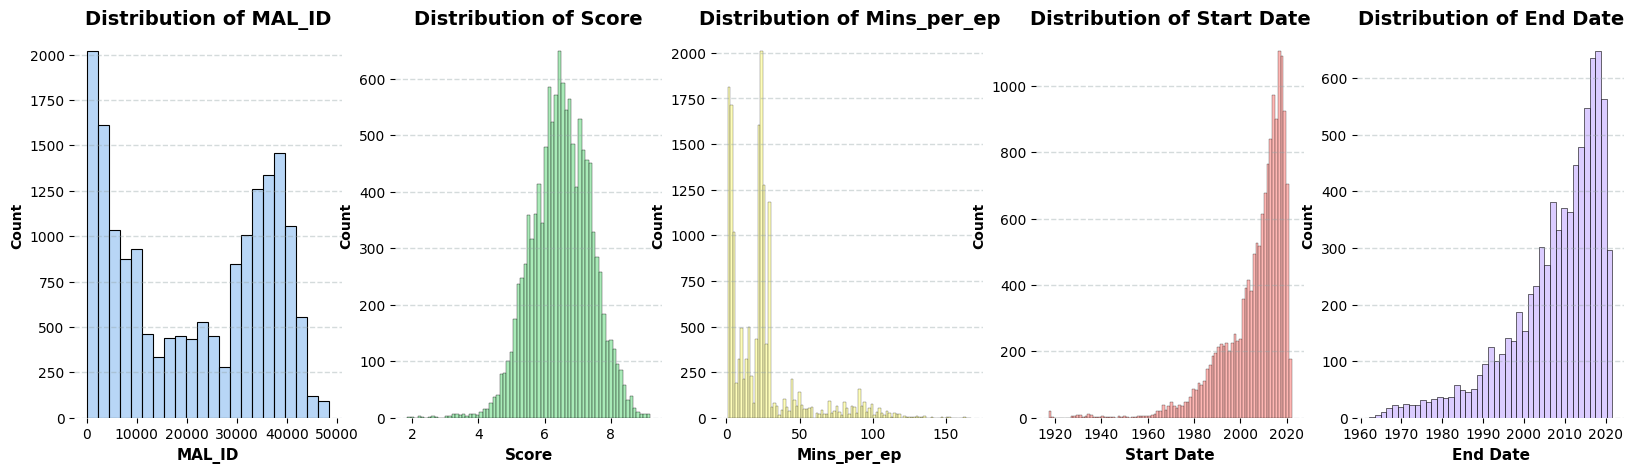

In [18]:
col = ['MAL_ID','Score', 'Mins_per_ep','Start Date', 'End Date']
color = ['#a1c9f4', '#8de5a1', '#fffea3', '#ff9f9b', '#d0bbff']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(len(col)):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i])
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=14, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=11, weight='bold')
    p.axes.set_ylabel('Count',fontsize=10, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**NHẬN XÉT**:
+ Xét `MAL_ID`:
    + Biểu đồ này có dạng phân phối chuẩn, là dạng phân phối lý tưởng mà các quá trình hướng tới. Điều này cho thấy các dữ liệu trong tập dữ liệu này có sự phân bố đều đặn, không có giá trị nào quá cao hoặc quá thấp.
    + ID của các anime trong dữ liệu chủ yếu tập trung nhiều trong đoạn từ 0 đến 10,000

+ Xét `Score`:
    + Biểu đồ này có dạng phân phối lệch phải, nghĩa là có nhiều giá trị nằm ở bên phải trung tâm hơn so với bên trái. Điều này cho thấy trong tập dữ liệu về anime này có nhiều anime có điểm cao và giá trị này cao hơn giá trị trung bình của điểm.
    + Hầu hết các anime đều có phổ điểm từ 6.5 đến 8.
    + Rất ít anime có điểm dưới 5 và cũng rất ít anime được đánh giá cao điểm từ 9 đến 10.

+ Xét `Mins_per_ep`:
    + Phần lớn các anime có thời lượng mỗi tập rơi vào khoảng dưới 25 phút.
    + Một vài anime có thời lượng phát sóng 1 tập từ 50 đến 100 phút. Thường thì đây sẽ là những bộ anime dạng (Type) Movie nên thời lượng mới nhiều như thế.

+ Xét `Start Date`:
    + Biểu đồ này có dạng phân phối lệch trái, nghĩa là có nhiều giá trị nằm ở bên trái trung tâm hơn so với bên phải. Điều này có nghĩa là càng về sau thì anime được phát hành nhiều so với quá khứ.
    + Ở những năm đầu thì có rất ít bộ anime được phát sóng. Bắt đầu từ năm 2000 cho đến hiện tại thì số anime được phát hành đã vượt rất xa và chênh lệch nhiều so với nhưng năm trước đó. Có thể thấy anime ngày càng phổ biến và được biến đến nhiều hơn.
    + Từ năm 2010 đến 2019 là khoảng thời gian có nhiều bộ anime được ra mắt nhất.
    
+ Xét `End Date`:
    + Có thể thấy càng về những năm sau thì số anime được hoàn thành càng tăng.
    + Năm 2018-2019 là 2 năm có nhiều anime được hoàn thành nhất.

Với **`Episodes`**, **`Ranked`**, **`Popularity`**, **`Members`** và **`Favorites`**

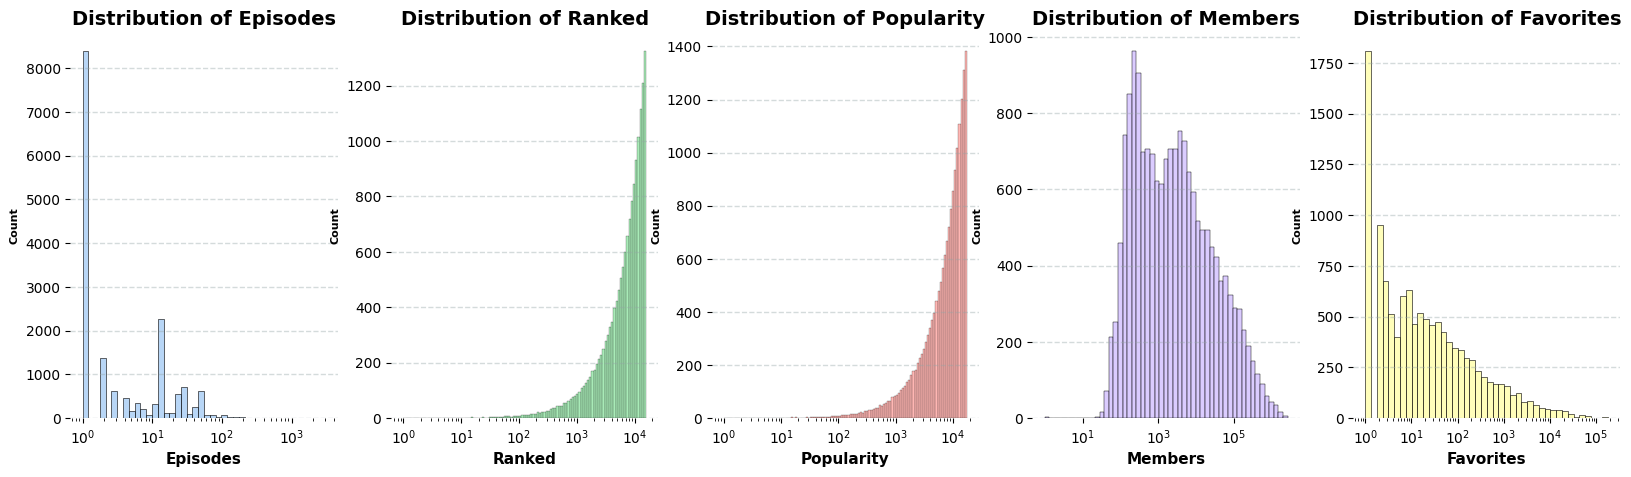

In [19]:
col = ['Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff','#fffea3']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i in range(len(col)):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=14, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=11, weight='bold')
    p.axes.set_ylabel('Count',fontsize=8, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**NHẬN XÉT**:
+ Xét `Episodes`:
    + Phần lớn các anime có từ 0 đến 10 tập đổ lại. Vẫn có số ít là anime dài tập với số tập từ 100 đến 1,000 tập.
    
+ Xét `Ranked` và `Popularity`:
    + Biểu đồ của 2 cột này nhìn khá tương tự nhau vì trên thực tế cả 2 đều là dạng bảng xếp hạng.
    + Rất ít anime có thứ hạng cao và độ phổ biến cao. Phần lớn đều tập trung vào thứ hạng sau 1,000
    
+ Xét `Member`:
    + Có từ 800 đến 1,000 bộ anime được hơn 100 người dùng thêm vào danh sách yêu thích của họ.
    + Có hơn 200 bộ anime được tận 100,000 thêm vào danh sách
 
+ Xét `Favorite`:
    + Biểu đồ phân bố theo kiểu giảm dần, điều đó cho thấy rằng rất ít anime được nhiều lượt yêu thích. Đa số các anime đều có lượt yêu thích từ 100 đổ lại.

Với **`Watching`**, **`Completed`**, **`On-Hold`**, **`Dropped`** và **`Plan to Watch`**

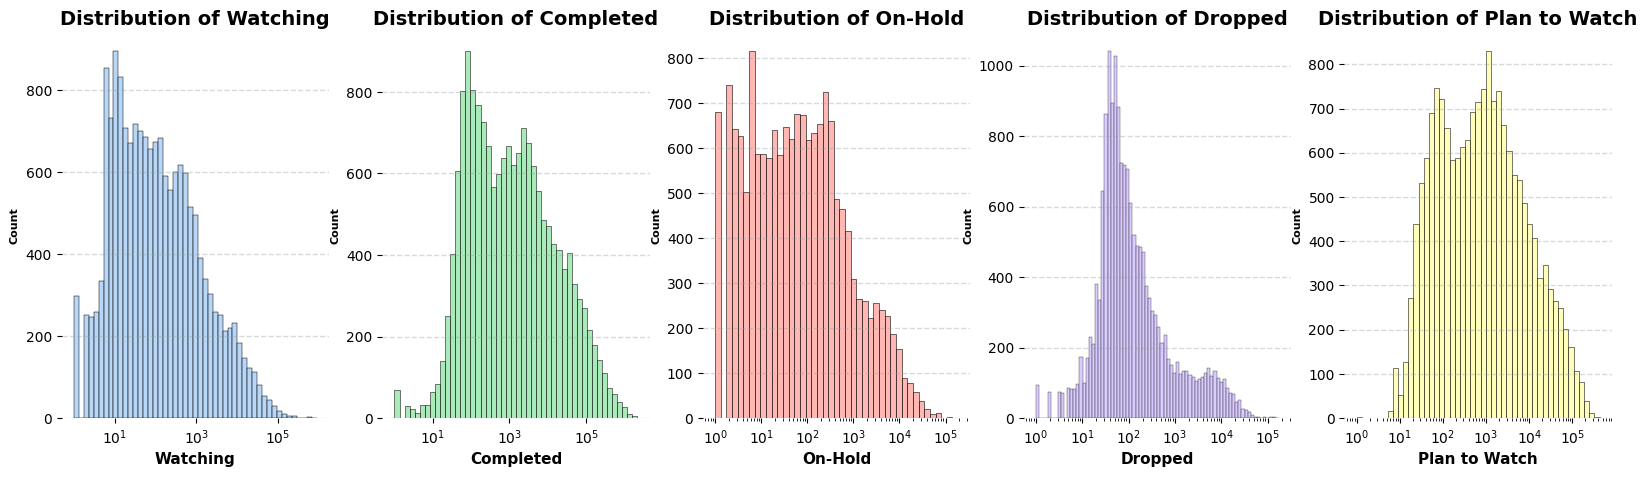

In [20]:
col = ['Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff','#fffea3']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i in range(len(col)):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=14, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=11, weight='bold')
    p.axes.set_ylabel('Count',fontsize=8, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

Với **`Score-10`**, **`Score-9`**, **`Score-8`**, **`Score-7`**, **`Score-6`**,
**`Score-5`**, **`Score-4`**, **`Score-3`**, **`Score-2`** và **`Score-1`**

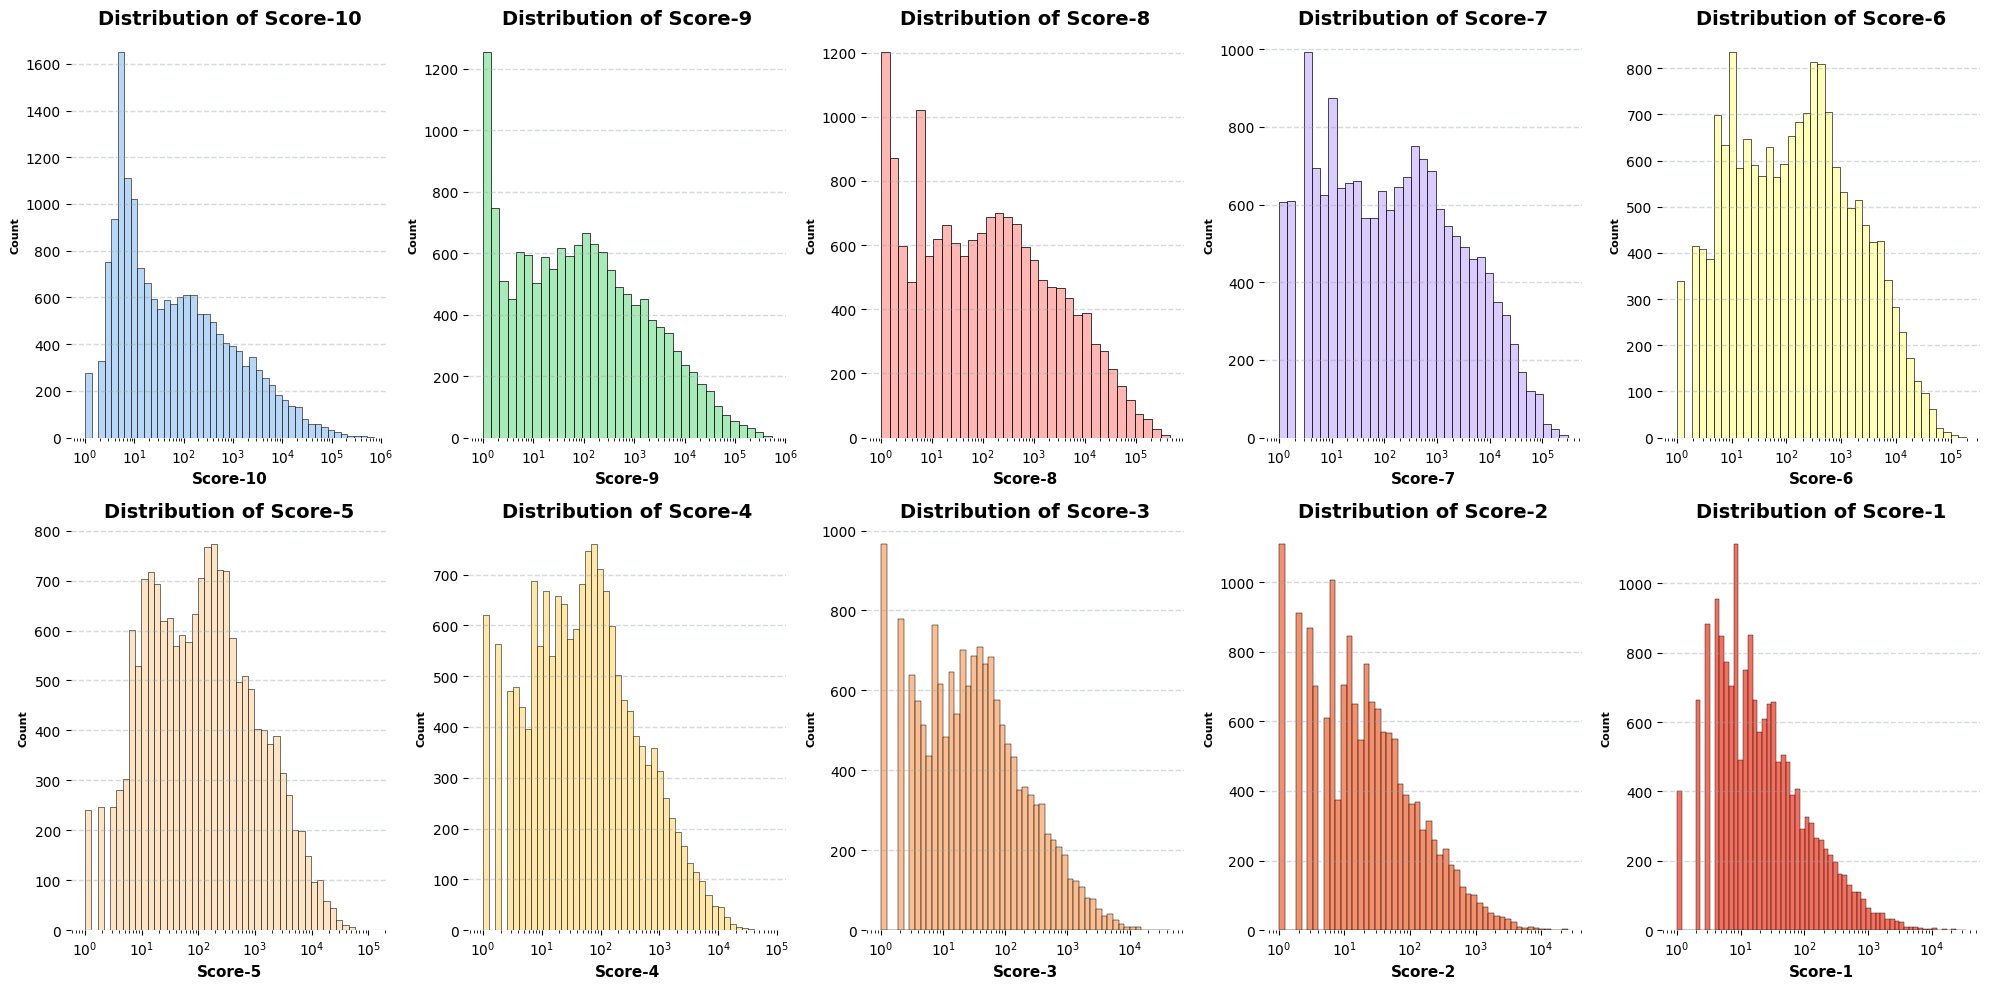

In [21]:
col = ['Score-10', 'Score-9', 'Score-8','Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3','#fcdcb0','#FEE08B','#faa96e','#f36b3b','#ef3f28','#CC0028']

nrows=2 
ncols=5

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i < len(col):
            ax_i = ax[r,c]
            p = sns.histplot(data=anime_df[col[i]], ax=ax_i, color=color[i], log_scale=True)
            p.axes.set_title(f"Distribution of {col[i]}",fontsize=14, color='k', weight='bold')
            p.axes.set_xlabel(f"{col[i]}",fontsize=11, weight='bold')
            p.axes.set_ylabel('Count',fontsize=8, weight='bold')
            p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()

<a class = "anchor" id = "2.2"></a>
## <span style='color:#2B9C15 '> 2.2 Các cột phân loại </span>

Các cột có kiểu dữ liệu không phải kiểu số là: 

|**Tên Cột**|**Kiểu dữ liệu**|
|:---|:---|
|`Name`|string|
|`English name`|string|
|`Japanese name`|string|
|`Type`|string|
|`Premiered`|string|
|`Source`|string|
|`Rating`|string|
|`Genres`|list|
|`Producers`|list|
|`Licensors`|list|
|`Studios`|list|

Đối với các cột có kiểu dữ liệu không phải là số, ta sẽ tính:
- Tỷ lệ giá trị bị thiếu [`Missing_ratio`]
- Số lượng giá trị duy nhất trong mỗi cột [`Num_diff_vals`]
- Phân phối từng cột (số lần xuất hiện của từng giá trị duy nhất) [`Distribution`]

**Xét các cột có kiểu dữ liệu string:  `Name`, `English name`, `Japanese name`, `Type`, `Premiered`, `Source` và `Rating`** 

In [22]:
str_col_name = ['Name', 'English name', 'Japanese name', 'Type', 'Premiered', 'Source' , 'Rating']
str_col_dist_df = pd.DataFrame(columns=str_col_name,
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = anime_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = anime_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (anime_df[['Name', 'English name', 'Japanese name', 'Type', 'Premiered', 'Source' , 'Rating']] == '').sum() / anime_df.shape[0] * 100
str_col_dist_df

,Name,English name,Japanese name,Type,Premiered,Source,Rating
Missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Num_diff_vals,17558,6831,16679,7,231,16,7
Distribution,{'Maou Gakuin no Futekigousha: Shijou Saikyou ...,"{'Unknown': 10565, 'Meow Meow Japanese History...","{'Unknown': 48, 'ゲゲゲの鬼太郎': 6, '僕のヒーローアカデミア': 5...","{'TV': 4996, 'OVA': 3894, 'Movie': 3041, 'Spec...","{'Unknown': 12817, 'Spring 2017': 86, 'Fall 20...","{'Original': 5215, 'Manga': 3825, 'Unknown': 3...","{'PG-13 - Teens 13 or older': 6132, 'G - All A..."


*Nhận xét chung*:
+ Xét **Missing_ratio**:
    + Các cột có kiểu dữ liệu là string đều không bị thiếu dữ liệu.
+ Xét **Num_diff_vals**	và **Distribution**:
    + Vẫn có những anime trùng tên trong dữ liệu.
    + Cột `Type`, `Rating` có 7 loại giá trị và `Source` có 16 loại 

Đầu tiên, ta sẽ xem xét sự phân bố dữ liệu của cột **`Type`** và **`Rating`**. Bởi vì 2 cột này chỉ có 7 giá trị phân loại nên ta chọn biểu đồ tròn để vẽ sự phân bố dữ liệu

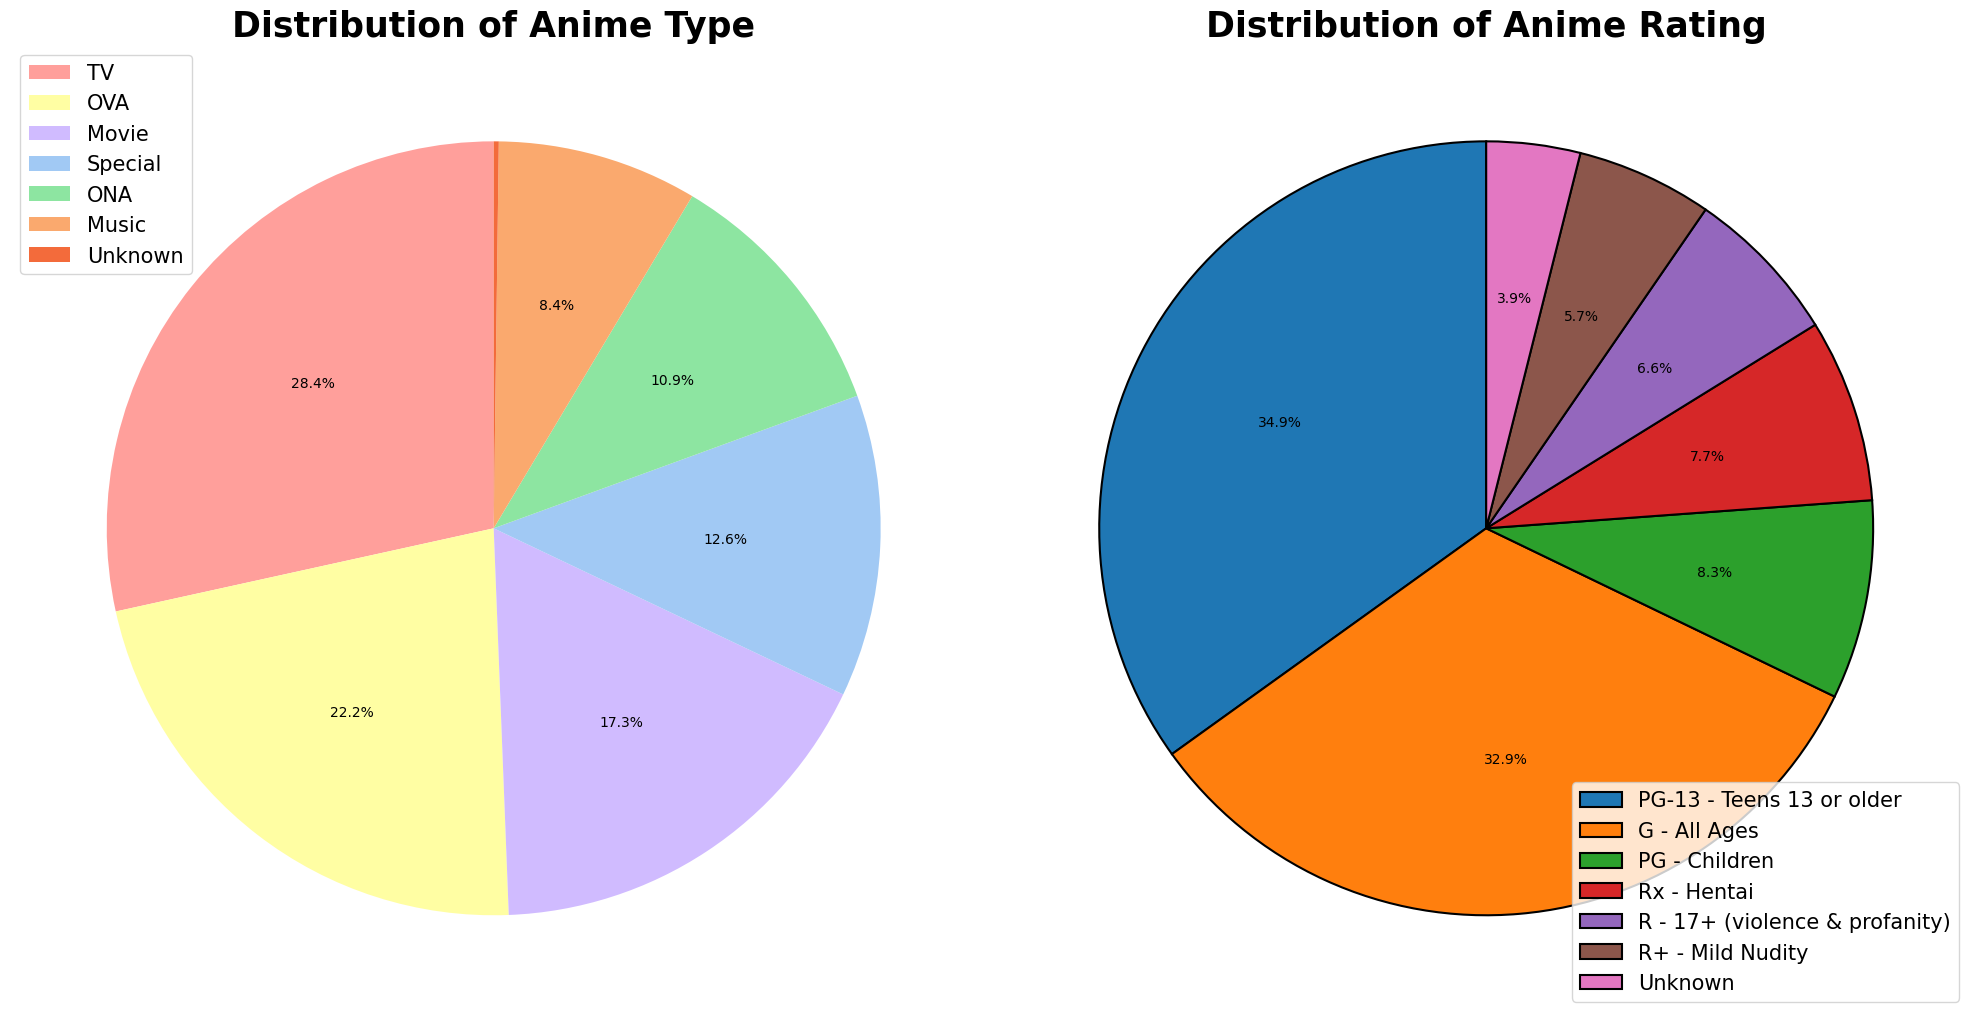

In [23]:
type_counts = anime_df['Type'].value_counts()
rating_counts = anime_df['Rating'].value_counts()

colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1',"#faa96e","#f36b3b"]
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].pie(type_counts,autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '', colors=colors,startangle=90)
ax[0].set_title('Distribution of Anime Type', fontsize=25, weight='bold')
ax[0].legend(type_counts.index,fontsize=15,loc='upper left')

ax[1].pie(rating_counts,autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '',startangle=90,wedgeprops={"edgecolor":"k",'linewidth': 1.5}) #, labels=rating_counts.index
ax[1].set_title('Distribution of Anime Rating', fontsize=25, weight='bold')
ax[1].legend(rating_counts.index,fontsize=15,loc='lower right')

plt.tight_layout()


**NHẬN XÉT CHUNG**:
+ Xét `Type`:
    + Các anime được phát hành dưới dạng bộ (TV) là nhiều nhất. Đứng thứ 2 là anime được phát hành theo dạng OVA.
+ Xét `Rating`:
    + Các anime phần lớn đều giới hạn độ tuổi là 13 tuổi trở lên. Bất ngờ là các anime không giới hạn độ tuổi chỉ đứng ở vị trí thứ 2.

Tiếp theo, hãy cùng tìm hiểu xem sự phân bố dữ liệu của cột **`Source`**. Vì cột này có tận 16 giá trị phân loại nên ta sẽ dùng biểu đồ cột để thể hiện sự phân bố.

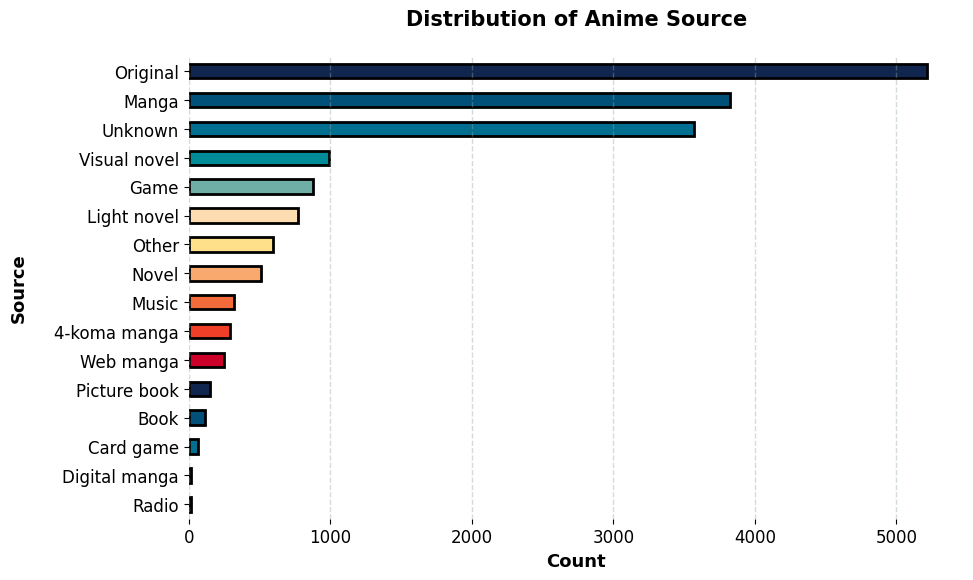

In [24]:
source_count = anime_df['Source'].value_counts()

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

source_count.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Distribution of Anime Source\n', fontsize=15, color='k', weight='bold')
plt.xlabel('Count', fontsize=13, weight='bold')
plt.ylabel('Source\n', fontsize=13, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.show()

Cuối cùng, ta xét sự phân bố dữ liệu của cột **`Name`**, **`English name`** và **`Japanese name`**. Nhưng mà bởi vì về cơ bản 3 cột này đều hiển thị thông tin về tựa đề của anime nên ta sẽ chọn 1 cột đại diện để trực quan. Thêm vào đó, các cột này đều có rất nhiều giá trị phân loại nên ta sẽ chỉ trực quan 10 giá trị xuất hiện nhiều nhất. 

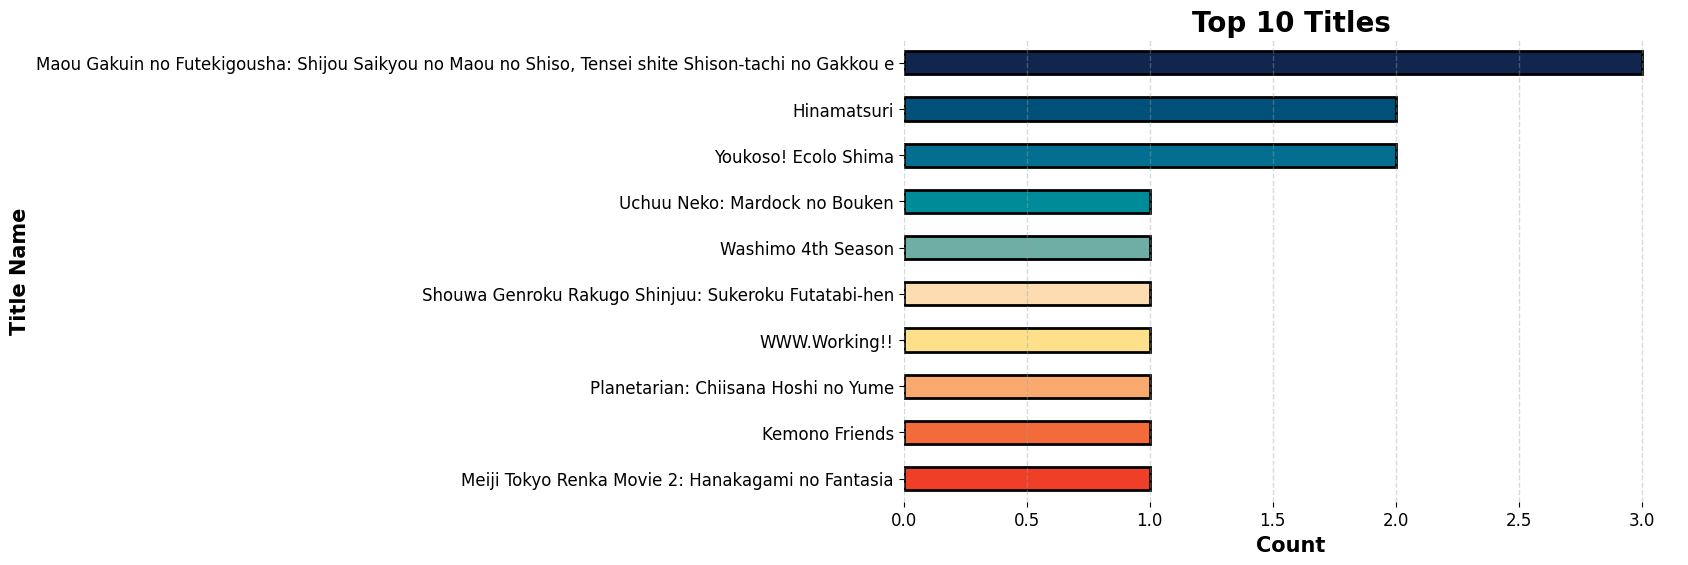

In [25]:
top_10_titles = anime_df['Name'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_titles.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Titles', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Title Name', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.show()

**Xét các cột có kiểu dữ liệu list:  `Genres`, `Producers`, `Licensors` và `Studios`** 

Với 4 cột này, mỗi dòng trong cột sẽ là 1 list các giá trị mà mỗi giá trị chính là 1 phân loại. Vì thế nên muốn phân tích 4 cột này ta sẽ:
+ Ta sẽ concate các list (trong từng cột) với nhau.
+ Dùng unique để tính ra các `Diff_vals` cho từng cột, `Num_diff_vals` sẽ là độ dài của `Diff_vals` vừa tính.
+ `Missing_ratio` sẽ là tỉ lệ những dòng có list rỗng cho từng cột.

In [26]:
lis_col_name = ['Genres', 'Producers', 'Licensors', 'Studios']
list_col_dist_df = pd.DataFrame(columns=lis_col_name ,
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

# Concatenate and find unique values
list_col_dist_df.loc['Distribution'] = anime_df[lis_col_name].apply(lambda col: pd.Series(col.sum()).value_counts().to_dict())

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'] = list_col_dist_df.loc['Distribution'].apply(len)

list_col_dist_df.loc['Missing_ratio'] = anime_df[lis_col_name].apply(lambda col: (col.apply(lambda x: len(x) == 0)).mean() * 100)

list_col_dist_df

,Genres,Producers,Licensors,Studios
Missing_ratio,0.358729,44.379911,77.531033,40.308621
Num_diff_vals,43,1306,78,722
Distribution,"{'Comedy': 6029, 'Action': 3888, 'Fantasy': 32...","{'NHK': 715, 'Aniplex': 495, 'TV Tokyo': 476, ...","{'Funimation': 1118, 'Sentai Filmworks': 744, ...","{'Toei Animation': 778, 'Sunrise': 502, 'J.C.S..."


**NHẬN XÉT CHUNG**:
+ Xét `Missing_ratio`:
    + Cột `Genres` thiếu rất ít dữ liệu, khoảng 0.36% trong khi 3 cột còn lại thiếu rất nhiều. Nhiều nhất là cột `Licensors` thiếu hơn 75% dữ liệu.
+ Xét `Num_diff_vals` và `Distribution`:
    + Có tổng cộng 43 thể loại anime và 78 nhà cấp bản quyền cho anime trong tập dữ liệu.
    + Có 1306 nhà sản xuất và 722 studios có thể làm ra các bộ anime. Từ đó thấy được sự phát triển của ngành công nghiêp Anime.

Bởi vì 4 cột này đều có rất nhiều phân loại nên ta sẽ trực quan hóa 10 phân loại cho mỗi cột để xem sự phân bố dữ liệu.

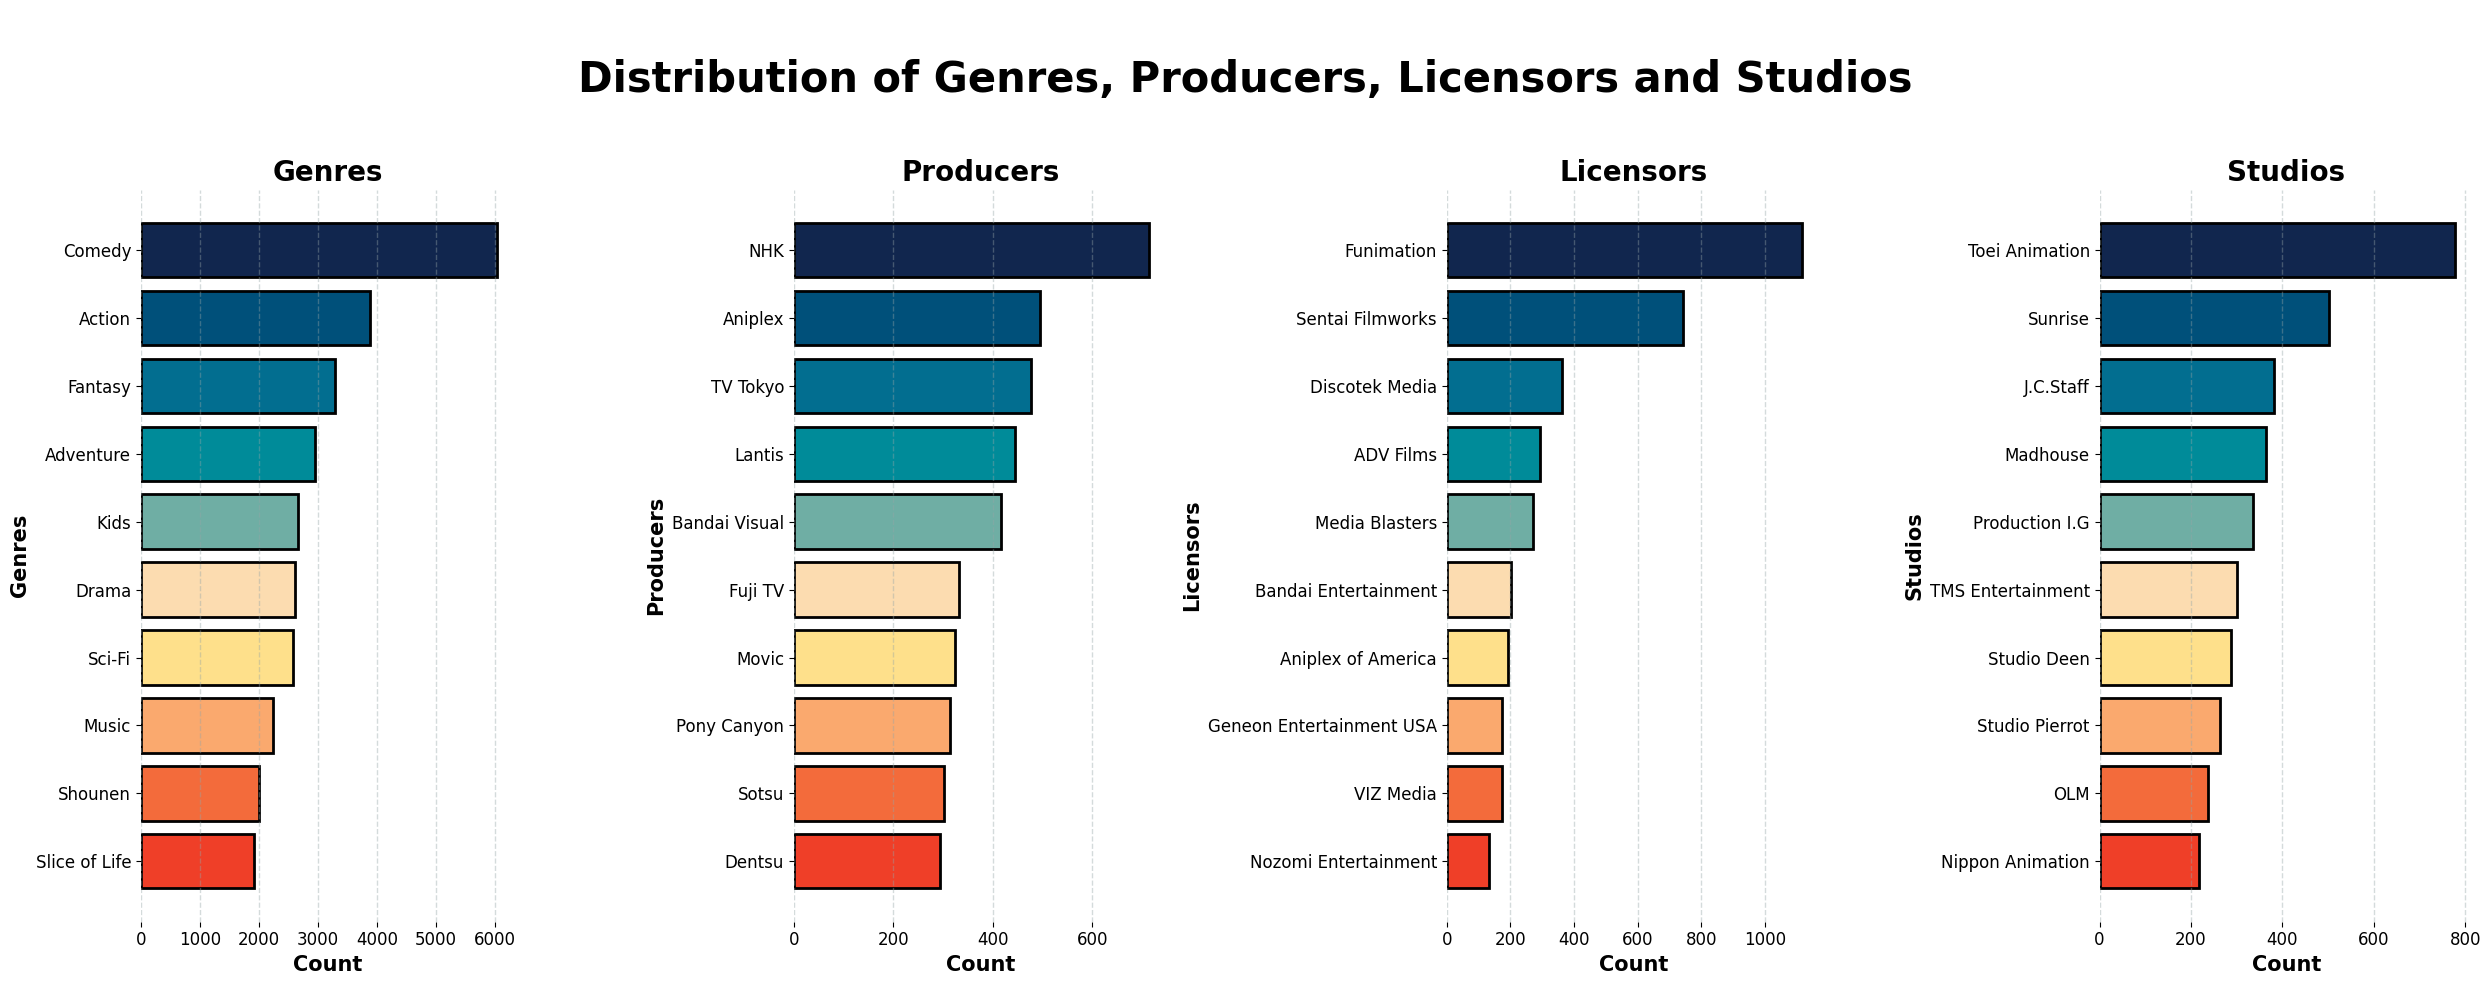

In [27]:
# visualize the distribution of genres and themes
genres = anime_df['Genres'].explode()
genres_counts = genres.value_counts().head(10)
producers = anime_df['Producers'].explode()
producers_counts = producers.value_counts().head(10)
licensors = anime_df['Licensors'].explode()
licensors_counts = licensors.value_counts().head(10)
studios = anime_df['Studios'].explode()
studios_counts = studios.value_counts().head(10)

fig, ax = plt.subplots(1, 4, figsize=(25, 10))
fig.suptitle('\nDistribution of Genres, Producers, Licensors and Studios\n', fontsize=30, fontweight='bold')
for i, (col, counts) in enumerate(zip(lis_col_name, [genres_counts, producers_counts, licensors_counts, studios_counts])):
    ax[i].barh(counts.index, counts, color=color, linewidth=2, edgecolor='k')
    ax[i].set_title(col, fontsize=20, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=15, weight='bold')
    ax[i].set_ylabel(f'{col}', fontsize=15, weight='bold')
    ax[i].tick_params(labelsize=12)
    ax[i].invert_yaxis()
    ax[i].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.4)


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**NHẬN XÉT**:
- Về phân phối của `Genres`:
    - *Comedy* có số lượng cao nhất, cho thấy đây là thể loại phổ biến nhất được sản xuất hoặc được quan tâm.
    - Các thể loại khác như *Action*, *Fantasy* và *Adventure* cũng có số lượng đáng kể.
    - Những thể loại như *Shounen* và *Slice of Life* có số lượng ít nhất, cho thấy chúng ít phổ biến hơn.
- Về phân phối của `Producers`:
    - *NHK* dường như là công ty sản xuất hàng đầu, tiếp theo là *Aniplex* và *TV Tokyo*.
    - Các công ty như *Pony Canyon* và *Dentsu* có số lượng thấp hơn, cho thấy họ sản xuất kém hiệu quả hơn.
- Về phân phối của `Licensors`:
    - *Funimation* là chủ sở hữu quyền chiếm ưu thế, với số lượng cao nhất.
    - *Sentai Filmworks* và *Discotek Media* cũng là những chủ sở hữu bản quyền có số lượng khá lớn.
    - *Nozomi Entertainment* và *VIZ Media* có thanh ngang ngắn hơn, cho thấy lượng nắm giữ ít hơn.
- Về phân phối của `Studios`:
    - *Toei Animation* dẫn đầu với số lượng cao nhất, cho thấy khối lượng sản phẩm lớn hoặc sự tham gia năng nổ của studio này.
    - Các studio như *J.C.Staff*, *Madhouse* và *Production I.G* cũng có sự hiện diện vững chắc.
    - *OLM* và *Nippon Animation* là những studio có số lượng tham gia ít nhất.

<a class = "anchor" id = "2.3"></a>
## <span style='color:#2B9C15 '> 2.3 Xử lý các cột và hàng bị thiếu giá trị </span>

#### 👉Tỷ lệ thiếu ở các cột

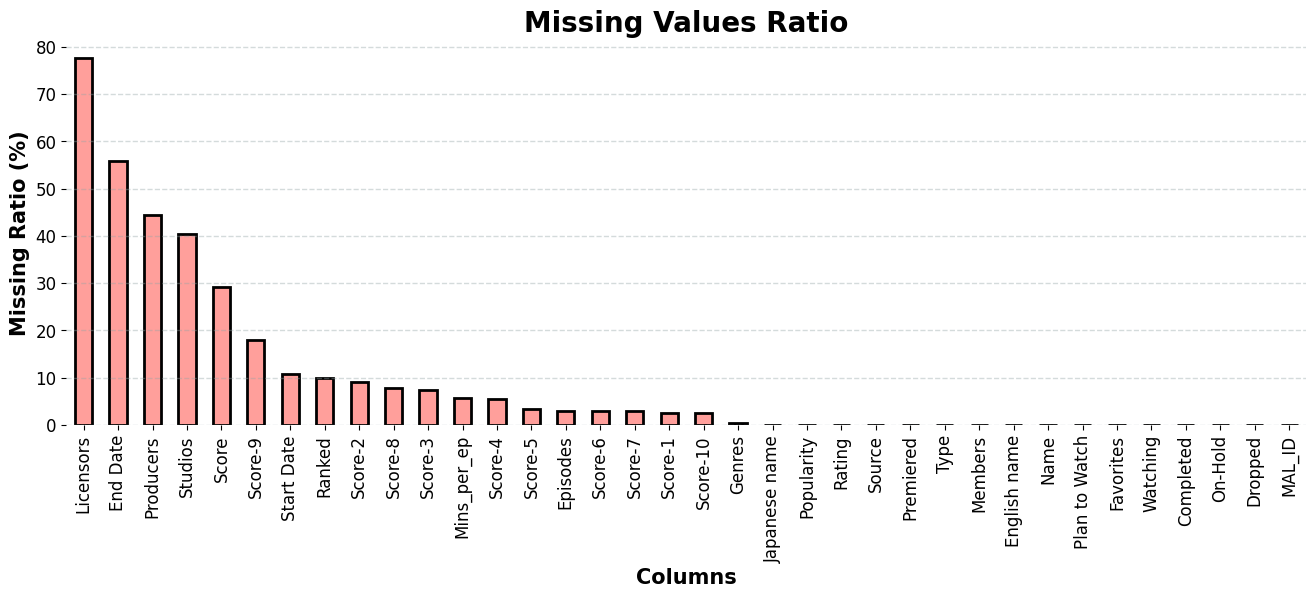

In [28]:
missing_ratio_df = pd.concat([num_col_dist_df.loc['missing ratios'], str_col_dist_df.loc['Missing_ratio'], list_col_dist_df.loc['Missing_ratio']], axis=0)
missing_ratio_df = missing_ratio_df.sort_values(ascending=False)
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Missing Values Ratio', fontsize=20, fontweight='bold')
plt.xlabel('Columns', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

#### 👉Xử lý các cột có tỷ lệ thiếu

In [29]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict, threshold: float = 50.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped columns: " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no columns to trim.")
        
    return df_cp

Xóa đi các cột có tỷ lệ thiếu vượt quá 50%

In [30]:
anime_df = drop_missing_features(anime_df, missing_ratio_df, threshold=50.0)
print(f'The shape of the DataFrame after dropping columns: {anime_df.shape}')

[LOG] Dropped columns: Licensors End Date
The shape of the DataFrame after dropping columns: (17562, 34)


Do 2 cột `Licensors` và `End Date`có tỷ lệ thiếu vượt quá 50% nên đã bị loại bỏ.

#### 👉Tỷ lệ thiếu ở các hàng

In [31]:
number_missing_per_row = anime_df.isna().sum(axis=1)
missing_per_row_df = pd.DataFrame({'Number of Rows': number_missing_per_row.value_counts().sort_index()})
missing_per_row_df.index.name = 'Number of Missing Values'
missing_per_row_df['Percentage'] = (missing_per_row_df['Number of Rows'] / anime_df.shape[0] * 100).round(2)
missing_per_row_df

,Number of Rows,Percentage
Number of Missing Values,,
0,9981,56.83
1,3317,18.89
2,1734,9.87
3,962,5.48
4,506,2.88
5,292,1.66
6,183,1.04
7,112,0.64
8,61,0.35


**NHẬN XÉT**:
- Có thể thấy rằng phần lớn các hàng đều thiếu khoảng 1 đến 15 giá trị, chiếm tỷ lệ khá ít so với tổng số là 35 cột. Cho nên ta sẽ không xóa các hàng này.

In [32]:
missing_dict = {}

for col in anime_df.columns:
    if type(anime_df[col].iloc[0]) == list:
        missing_dict[col] = anime_df[col].apply(lambda x: len(x) == 0).sum() / anime_df.shape[0] * 100
    else:
        missing_dict[col] = anime_df[col].isna().sum() / anime_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
Producers,44.379911
Studios,40.308621
Score,29.273431
Score-9,18.033254
Start Date,10.716319
Ranked,10.033026
Score-2,9.093497
Score-8,7.806628
Score-3,7.442205
Mins_per_ep,5.631477


**NHẬN XÉT**:
- Sau khi xóa đi các cột có tỷ lệ thiếu lớn hơn 50% và kiểm tra lại tỷ lệ thiếu theo các cột bên trên, có thể nhận thấy rằng các cột có tỷ lệ thiếu lớn hơn 40% là `Studios` và `Producers`. Vì 2 cột này khá quan trọng, nổi bật và là cột chứa nội dung, nên chúng em không thể tiến hành điền thiếu hay xóa cột đi được.
- Ở các cột còn còn lại như `Score1-10`, `Start Date`, `Mins_per_ep`	... chúng em có cân nhắc đến việc điền **median** vào các dòng thiếu của cột nhưng một khi điền sẽ dẫn đến dữ liệu sau khi xử lý sẽ sai khá nhiều nên quyết định sau cùng của chúng em vẫn là giữ nguyên các cột này.

<a class = "anchor" id = "3"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Trực quan hóa dữ liệu</div>

Trong mục này, chúng ta sẽ trực quan hóa một vài thông tin sơ lược về anime trong dataset, bao gồm:
+ Top 10 anime được đánh giá **cao điểm nhất**
+ Top 10 anime có **nhiều lượt xem nhất**
+ Top 10 anime được **yêu thích nhất**
+ Top 10 anime được nhiều người đánh giá **10 điểm** nhất

<a class = "anchor" id = "3.1"></a>
## <span style='color:#2B9C15 '> 📕 3.1 Top 10 Anime có số điểm cao nhất </span>


In [33]:
top_10_anime = anime_df.nlargest(10, 'Score')

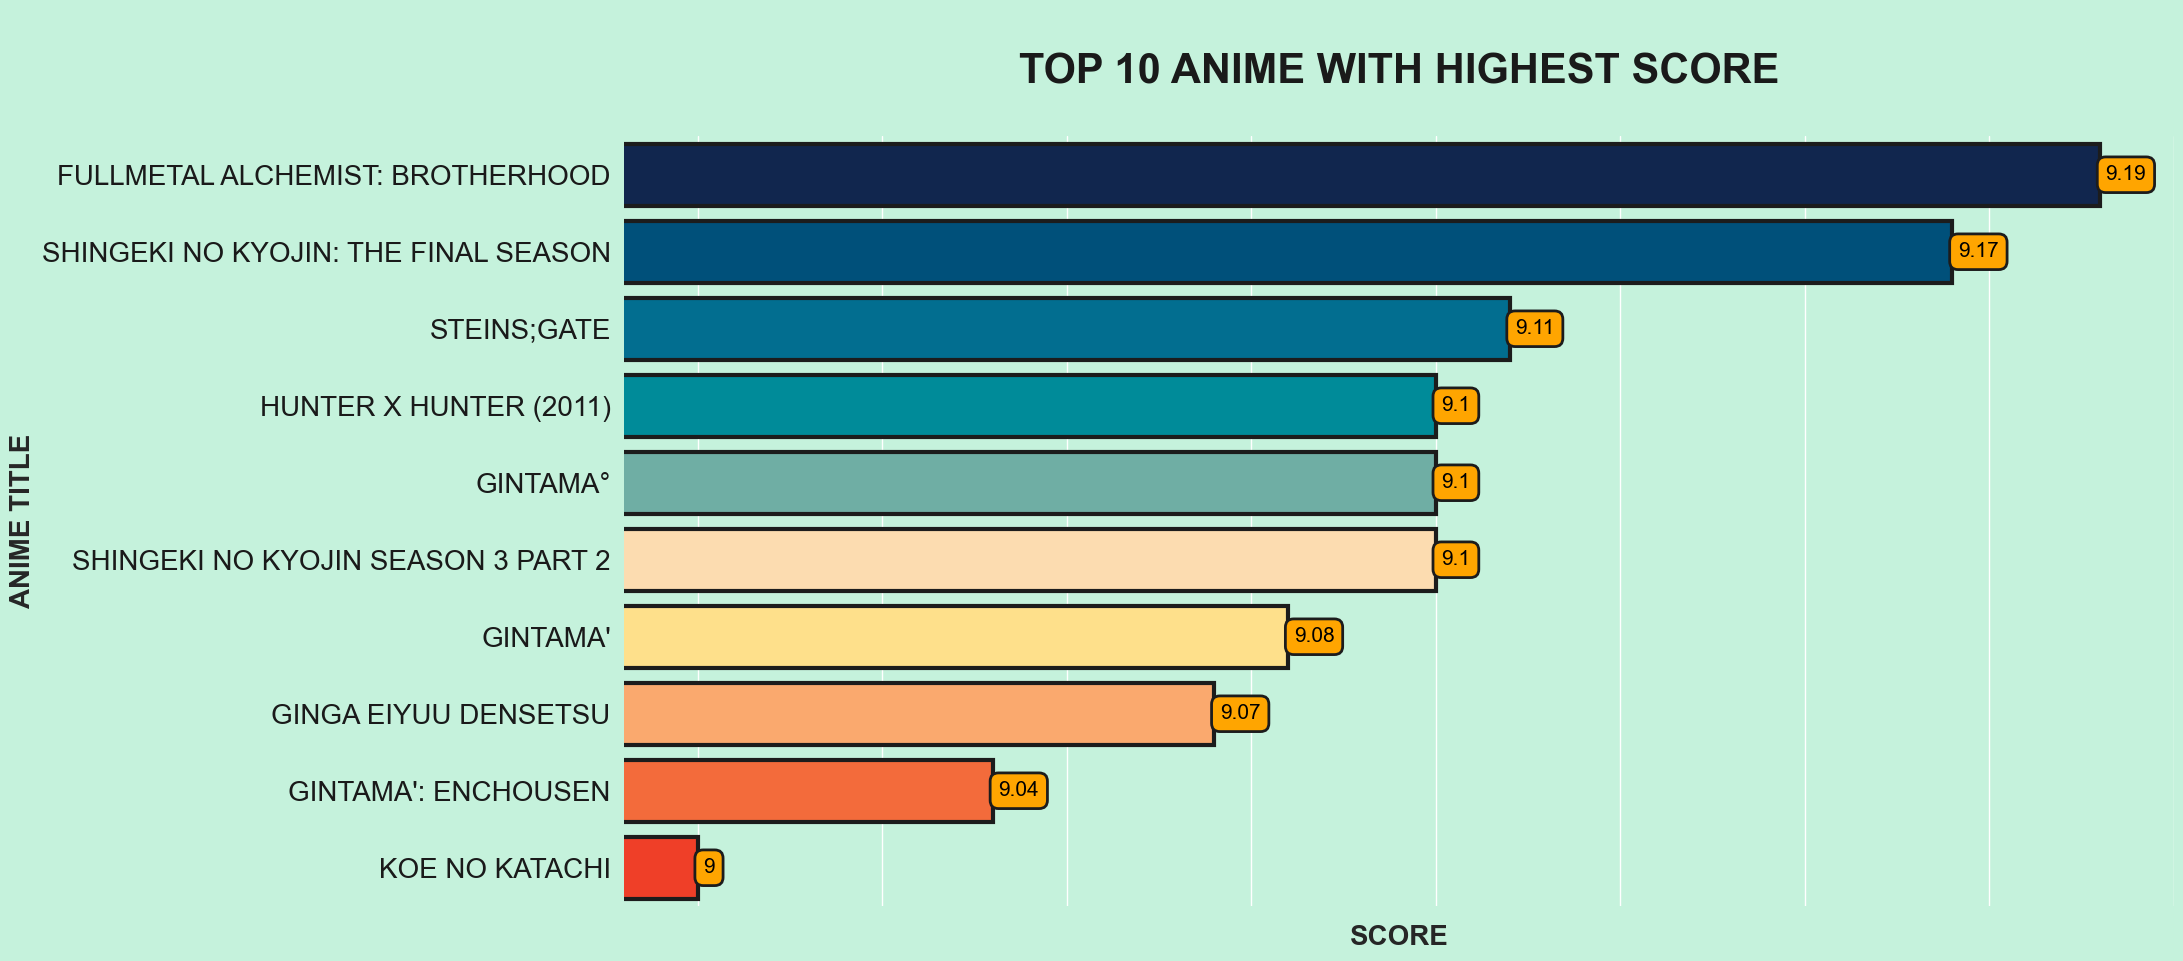

In [34]:
sns.set(rc={"axes.facecolor":"#c5f2dc","figure.facecolor":"#c5f2dc"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(data=top_10_anime, y='Name', x='Score',palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)

p.axes.set_title("\nTOP 10 ANIME WITH HIGHEST SCORE\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("SCORE",fontsize=20, weight='bold')
p.axes.set_ylabel("ANIME TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_anime['Name']]

p.axes.set_xticklabels(labels=[], fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

plt.xlim(min(top_10_anime['Score']) - 0.01, max(top_10_anime['Score']) + 0.01)
sns.despine(left=True, bottom=True)
plt.show()

**Nhận xét:**
- Điểm số cao chiếm ưu thế: Tất cả các điểm đều khá cao, thấp nhất là 9/10. Điều này cho thấy tuyển tập anime được đánh giá rất cao.
- Cạnh tranh chặt chẽ: Điểm số rất gần nhau, cho thấy sự cạnh tranh mạnh mẽ về mặt chất lượng giữa các tựa anime hàng đầu.
- Nhiều loại tiêu đề: Bảng xếp hạng bao gồm sự kết hợp của nhiều loại phim hoạt hình khác nhau, chẳng hạn như phim bộ và phim dài tập, cho thấy rằng cả hai dạng phim đều có khả năng đạt được sự hoan nghênh cao.
- Dẫn đầu *Fullmetal Alchemist: Brotherhood*: Anime này có số điểm cao nhất là 9.19, chỉ cao hơn 0.02 so với mức cao thứ hai, cho thấy mức độ cạnh tranh gay gắt của bảng xếp hạng.
- Chuỗi anime dài tập: *Gintama*, xuất hiện nhiều lần với các phần hoặc bộ truyện khác nhau. Điều này cho thấy *Gintama* có chất lượng cao liên tục qua các phần khác nhau.
- Series nổi tiếng: Sự hiện diện của *Shingeki no Kyojin (Attack on Titan)* lọt vào bảng xếp hạng với 2 mùa gồm mùa 3 *Shingeki no Kyojin Season 3 Part 2* và mùa cuối cùng *Shingeki no Kyojin: The Final Season* của nó cho thấy mức độ phổ biến liên tục và sự hoan nghênh của giới phê bình và khán giả.
- Tầm ảnh hưởng của phim cổ điển: *Ginga Eiyuu Densetsu* là một bộ truyện cũ hơn so với những bộ khác trong danh sách, cho thấy những tựa phim cổ điển vẫn có tầm quan trọng đáng kể trong cộng đồng anime.
- Sự góp mặt của phim điện ảnh: *Koe no Katachi* là một ví dụ về phim điện ảnh cùng với phim truyền hình dài tập, thể hiện sự thành công quan trọng của phim hoạt hình.
- Tác động văn hóa: Các anime được liệt kê không chỉ được biết đến vì điểm số cao mà còn vì tác động văn hóa và mức độ phổ biến trong cộng đồng anime.

<a class = "anchor" id = "#3.2"></a>
## <span style='color:#2B9C15 '> 📕  3.2 Top 10 Anime có lượt xem cao nhất </span>


In [35]:
top_10_anime = anime_df.nlargest(10, 'Watching')

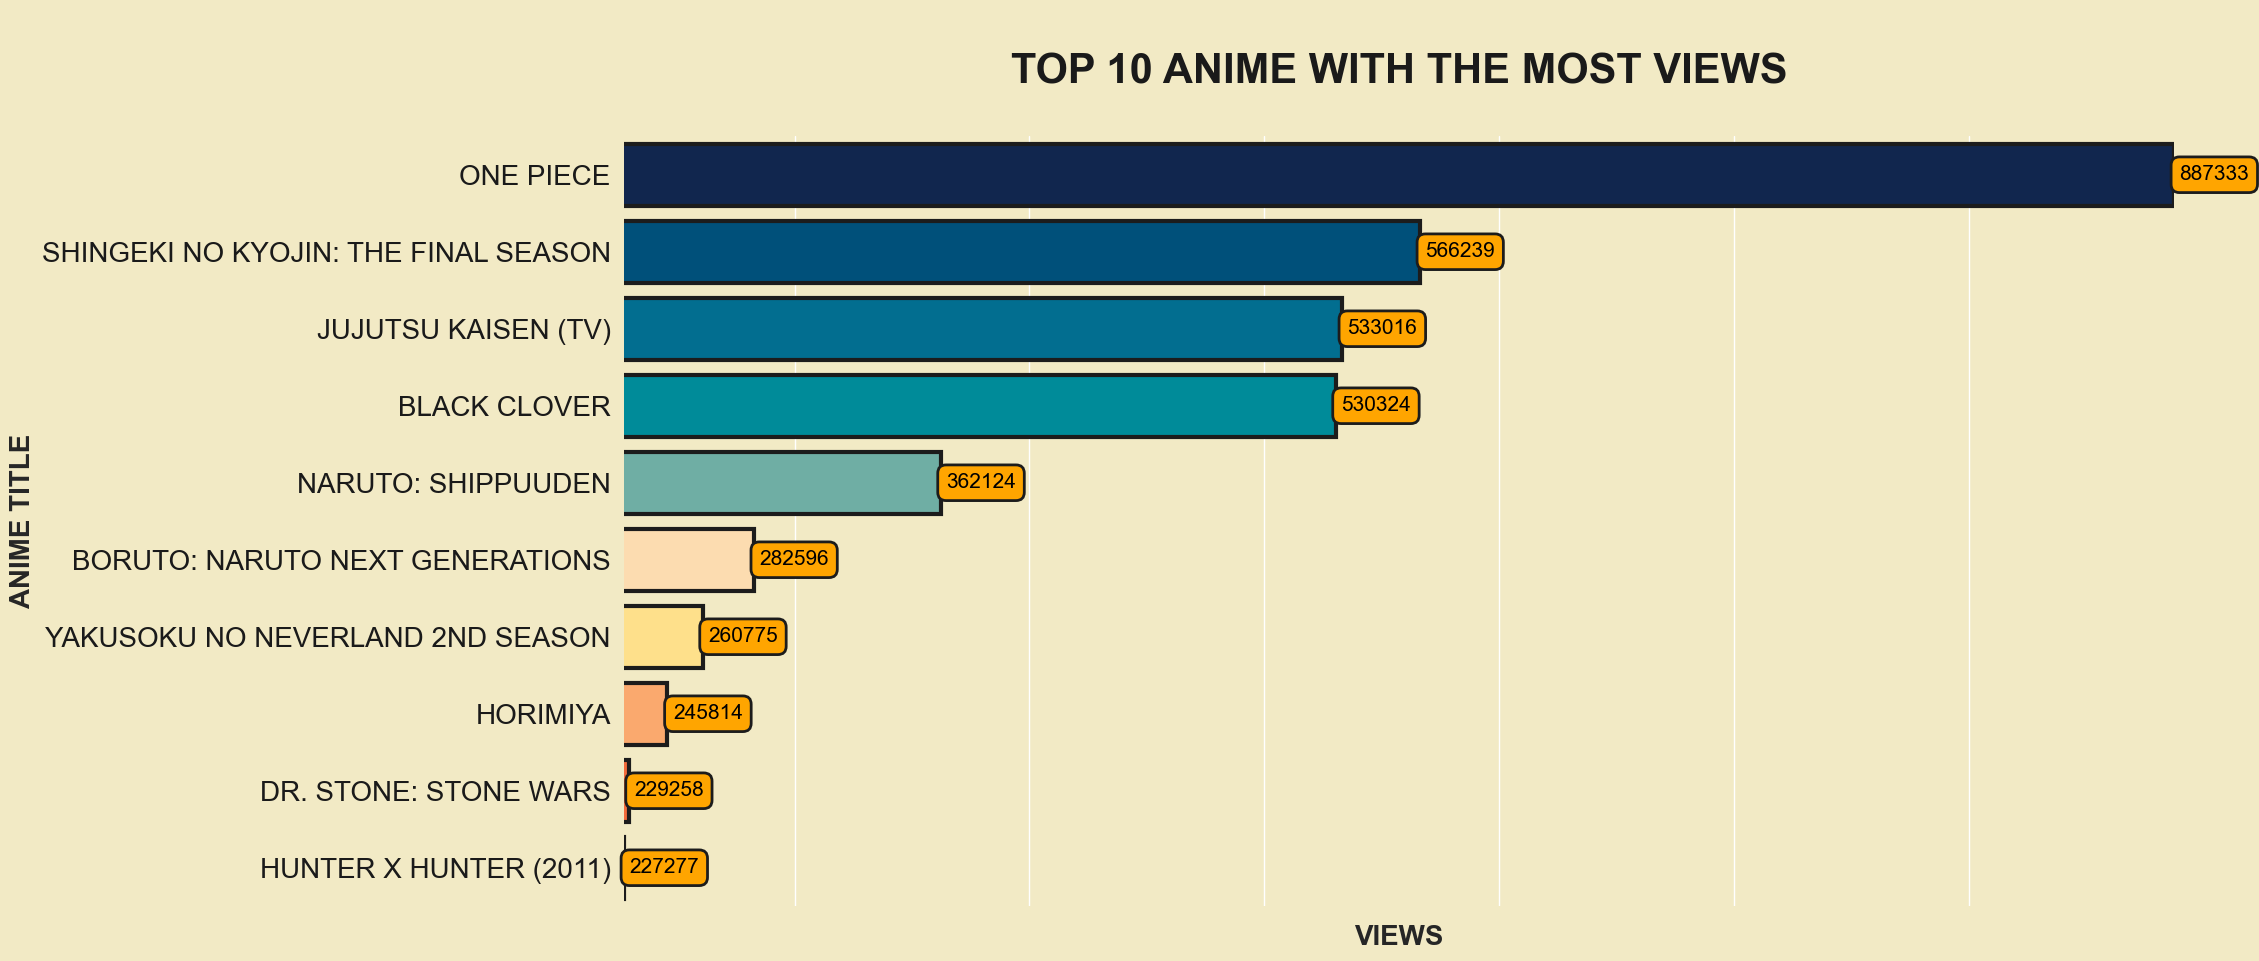

In [36]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(data=top_10_anime, y='Name', x='Watching',palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)

p.axes.set_title("\nTOP 10 ANIME WITH THE MOST VIEWS\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("VIEWS",fontsize=20, weight='bold')
p.axes.set_ylabel("ANIME TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_anime['Name']]

p.axes.set_xticklabels(labels=[], fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

plt.xlim(min(top_10_anime['Watching']) - 0.01, max(top_10_anime['Watching']) + 0.01)
sns.despine(left=True, bottom=True)
plt.show()

**NHẬN XÉT**:
- Mức độ phổ biến của loạt anime dài tập: Bảng xếp hạng bị thống trị bởi loạt anime dài tập. *One Piece* dẫn đầu bảng xếp hạng với một khoảng cách đáng kể, cho thấy mức độ phổ biến lâu dài của nó.
- Sự thống trị của thể loại Shonen: Bảng xếp hạng cho thấy thể loại Shonen, nhắm đến đối tượng khán giả nam trẻ tuổi với loạt phim hành động, cực kỳ phổ biến. Những bộ truyện như *Naruto: Shippuden*, *Boruto: Naruto Next Generations* và *Black Clover* được biết đến với đặc điểm là cùng thuộc thể loại Shonen.
- Giá trị thương hiệu từ thế hệ kế tiếp trong anime: Có những nhượng quyền thương mại có nhiều hơn một mục trong danh sách, chẳng hạn như *Naruto* với cả loạt anime gốc là *Shippuden* và phần tiếp theo của thế hệ con cháu từ bộ anime *Naruto* chính là *Boruto*. Điều này cho thấy lòng trung thành thương hiệu mạnh mẽ và sự quan tâm bền vững theo thời gian.
- Lượt xem gần đây: Các loạt phim tương đối mới hơn như *Jujutsu Kaisen (TV)* và *Dr. Stone: Stone Wars* cũng lọt vào top 10, cho thấy tác động và sự năng động của xu hướng người xem anime.
- Sự đa dạng của các studio và phong cách: Anime được liệt kê có thể đến từ nhiều studio khác nhau, mỗi studio có phong cách hoạt hình và kể chuyện riêng, phản ánh sự đa dạng trong ngành công nghiệp anime.
- Lượt xem làm thước đo: Việc sử dụng lượt xem làm thước đo để xếp hạng có thể không thể hiện đầy đủ chất lượng hoặc sự hoan nghênh của giới phê bình của một loạt phim nhưng là một tiêu chí tốt về mức độ phổ biến và phạm vi tiếp cận của loạt phim đó.

<a class = "anchor" id = "3.3"></a>
## <span style='color:#2B9C15 '> 📕 3.3 Top 10 Anime được yêu thích nhất  </span>


In [37]:
top_10_anime = anime_df.nlargest(10, 'Favorites')

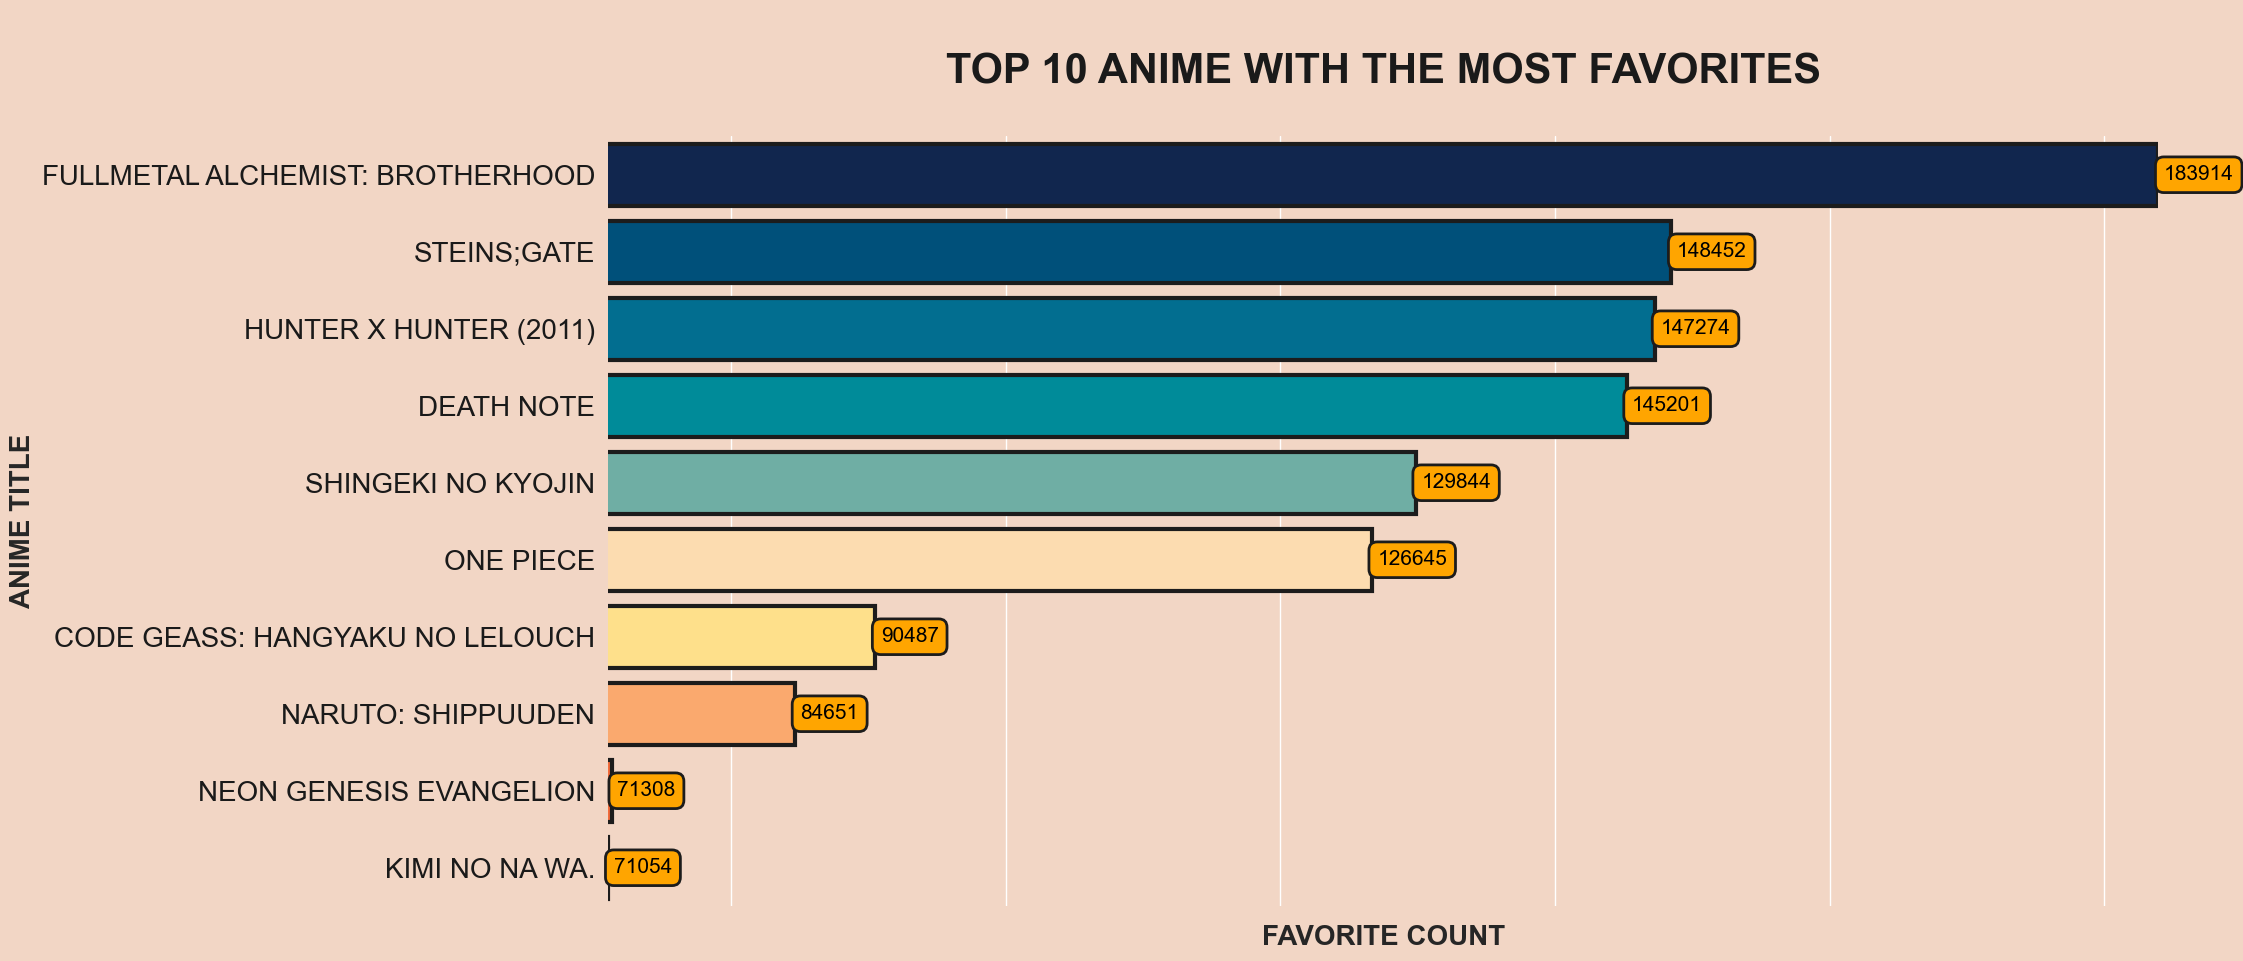

In [38]:
sns.set(rc={"axes.facecolor":"#f2d6c5","figure.facecolor":"#f2d6c5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(data=top_10_anime, y='Name', x='Favorites',palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)

p.axes.set_title("\nTOP 10 ANIME WITH THE MOST FAVORITES\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("FAVORITE COUNT",fontsize=20, weight='bold')
p.axes.set_ylabel("ANIME TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_anime['Name']]

p.axes.set_xticklabels(labels=[], fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

plt.xlim(min(top_10_anime['Favorites']) - 0.01, max(top_10_anime['Favorites']) + 0.01)
sns.despine(left=True, bottom=True)
plt.show()

**NHẬN XÉT**:
- Sức hấp dẫn rộng rãi: *Fullmetal Alchemist: Brotherhood* dẫn đầu bảng xếp hạng với một khoảng cách đáng kể, điều này nói lên bộ anime này được khán giả vô cùng yêu thích.
- Yêu thích vượt ngưỡng thời gian: Sự hiện diện của các bộ truyện cũ hơn như *Neon Genesis Evangelion* cùng với các tựa phim mới hơn cho thấy rằng một số anime nhất định có chất lượng vượt thời gian và tiếp tục thu hút và được yêu thích người hâm mộ mới.
- Di sản tiếp nối di sản: Tương tự như biểu đồ trước đây về lượng người xem, các loạt phim truyền thống như *Naruto: Shippuden* và *One Piece* xuất hiện trong danh sách yêu thích, cho thấy sự gắn kết và trung thành của người hâm mộ lâu dài.
- Mức độ phổ biến so với Mức độ ưa thích: Không giống như biểu đồ lượng người xem, biểu đồ yêu thích có thể thể hiện tốt hơn lượng người theo dõi cuồng nhiệt của một bộ phim dài tập thay vì chỉ lượng người xem thông thường hoặc phổ biến.

<a class = "anchor" id = "4"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">4. Tóm tắt </div>


### **1. Tổng quan về dữ liệu:**
- Dữ liệu có 17562 dòng và 35 cột. 
- Không có dòng nào trùng nên không có dòng nào bị drop cả. 
- Chuyển đổi kiểu dữ liệu phù hợp:
    - 13 cột là `Score`, `Episodes`, `Ranked`, `Score-10`, `Score-9`, `Score-8`, `Score-7`, `Score-6`, `Score-5`, `Score-4`, `Score-3`, `Score-2` và `Score-1` được chuyển đổi về **int/float**.
    - 4 cột là `Genres`, `Producers`, `Licensors` và `Studios`được chuyển đổi về kiểu **list**.
    - Cột `Aired` được chuyển đổi về kiểu **datetime**.
### **2. Phân phối dữ liệu**
- Phân phối của các cột số:
    - Phân phối của các cột số phần lớn đều lệch sang phải với *Phân phối của MAL_ID*, *Phân phối của Mins_per_ep*, *Phân phối của Rankded*, *Phân phối của Popularity*, *Phân phối của Members*, *Phân phối của Favorites*, *Phân phối của Watching*, *Phân phối của Completed*, *Phân phối của On-Hold*, *phân phối của Dropped* và *Phân phối của Score-1 đến Score 10* đều có biểu đồ có phân phối lệch sang phải.
    - *Phân phối của Plan to Watch*: Có vẻ là phân phối bán chuẩn nhưng vẫn hơi lệch phải.
    - Trong khi đó thì *Phân phối của Start Date* và *Phân bổ End Date* có biểu đồ là phân phối trái.
    - Những phân phối có độ lệch cao: *Phân phối của Episodes*
    - Cuối cùng là *Phân phối của Score*: Biểu đồ này có vẻ gần giống hình chuông và đối xứng xung quanh giá trị trung bình, cho thấy nó gần với phân phối chuẩn.
- Các cột phân loại:
    - Các cột không có kiểu dữ liệu số bao gồm: `Name`, `English name`, `Japanese name`, `Type`, `Premiered`, `Source`, `Rating`, `Genres`, `Producers`, `Licensors` và `Studios`.
    - Đối với mỗi cột phân loại, chúng em sẽ tiến hành thăm dò bằng cách tính toán tỷ lệ giá trị bị thiếu, số lượng giá trị riêng biệt và tần suất xuất hiện các giá trị duy nhất (phân phối).
    - Trực quan hóa các phân phối của các cột này.
- Về các giá trị bị thiếu:
    - Cột `Licensors` có tỷ lệ thiếu lên đến 75%, cột `End Date`có tỉ lệ thiếu hơn 50%, cột `Producers` có tỷ lệ là 44.4% và cột `Studios` có tỷ lệ là 40.3%. Vì cột `Licensors` và `End Date` có tỷ lệ thiếu quá cao nên cột này sẽ bị bỏ đi.
### **3. Trực quan hóa dữ liệu** 
+ *Top 10 anime được đánh giá cao điểm nhất*
+ *Top 10 anime có nhiều lượt xem nhất*
+ *Top 10 anime được yêu thích nhất*
+ *Top 10 anime được nhiều người đánh giá 10 điểm nhất*

<a class = "anchor" id = "5"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">5. Lưu lại dữ liệu sau khi xử lý </div>


In [39]:
anime_df.to_csv('../data/processed_anime.csv', index=False)

<div style="text-align: center; background-color: #958791; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
End
  
</div>